In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
!pip install pmdarima
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [9]:
# read train and test excel data
try: 
    df_train = pd.read_excel("../raw_data/gdp_base.xlsx", sheet_name="df_current_train")
    df_test = pd.read_excel("../raw_data/gdp_base.xlsx", sheet_name="df_current_test")

except FileNotFoundError:
    print("Error: gdp_base.xlsx not found. Please make sure the file is in the same directory as your notebook or provide the correct path.")
    df_train, df_test = None, None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df_train, df_test = None, None

print(df_train.head())

        date    y  y_lag     cpi    m4  m4_lend  loans  net_lend    br  \
0 1998-01-01  NaN    NaN     NaN   NaN      NaN    NaN       NaN   NaN   
1 1998-02-01  NaN    NaN  70.254  10.9      8.2    NaN       NaN  7.25   
2 1998-03-01  0.7    NaN  70.498  10.7      9.3    NaN       NaN  7.25   
3 1998-04-01  NaN    0.7  70.700  10.0      8.7    NaN       NaN  7.25   
4 1998-05-01  NaN    NaN  71.072  10.8      9.2    NaN       NaN  7.25   

      gscpi  ...  P3H_QoQ  P3N_QoQ  P51_QoQ  P51S_QoQ  P6_QoQ  P7_QoQ  Q_MoM  \
0       NaN  ...      NaN      NaN      NaN       NaN     NaN     NaN    NaN   
1 -1.073170  ...      NaN      NaN      NaN       NaN     NaN     NaN    0.5   
2 -0.435580  ...      NaN      NaN      NaN       NaN     NaN     NaN   -0.1   
3 -0.060024  ...      0.8      1.3      0.8       1.6     0.6     2.6   -0.2   
4 -0.118535  ...      NaN      NaN      NaN       NaN     NaN     NaN   -0.5   

   R_MoM  S_MoM  T_MoM  
0    NaN    NaN    NaN  
1   -6.8   -1.5   -1.8  

In [5]:
# convert data type of date to datetime
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])

# first see the summary of the data
# print(df_train.describe())

# check the y datetime
print(df_train['y'].dtypes)

# point plot for the y
plt.figure(figsize=(10, 6))
plt.plot(df_train['date'], df_train['y'])
plt.title('GDP growth rate')
plt.xlabel('Date')
plt.ylabel('GDP growth rate')
plt.show()



float64


KeyError: 'date'

<Figure size 1000x600 with 0 Axes>

In [10]:
# Convert 'date' column to datetime format if not already
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])
df_train.set_index('date', inplace=True)

# Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)

Text(0.5, 0, 'Date')

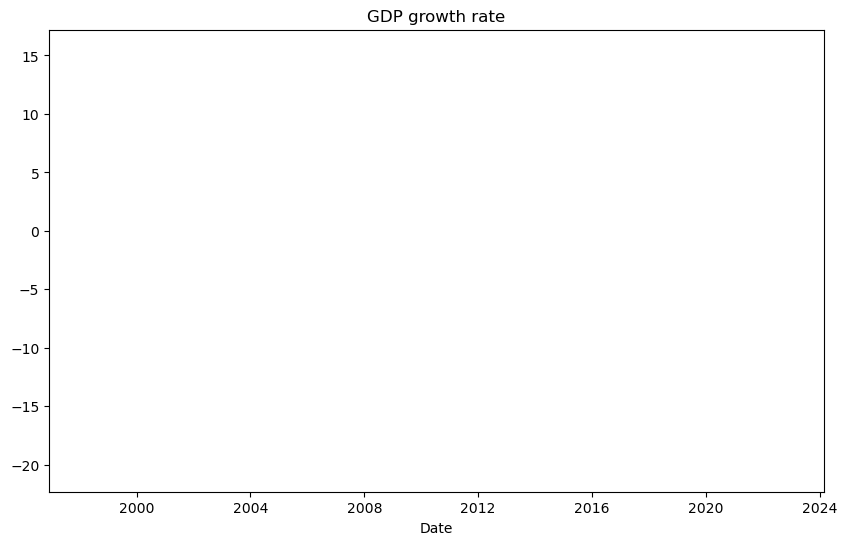

In [11]:
# create a plot for y 
plt.figure(figsize=(10, 6))
plt.plot(df_train['y'])
plt.title('GDP growth rate')
plt.xlabel('Date')

In [8]:
# Convert 'date' column to datetime format if not already
df_train['date'] = pd.to_datetime(df_train['date'])
df_train.set_index('date', inplace=True)

# Choose target variable (GDP growth, assumed to be 'y')
y = df_train['y'].dropna()

# List of features (excluding the target 'y')
features = [col for col in df_train.columns if col != 'y']

# Plot ACF and PACF for each feature
for feature in features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    plot_acf(df_train[feature].dropna(), ax=axes[0], lags=20)
    axes[0].set_title(f"Autocorrelation (ACF) of {feature}")

    plot_pacf(df_train[feature].dropna(), ax=axes[1], lags=20)
    axes[1].set_title(f"Partial Autocorrelation (PACF) of {feature}")

    plt.show()



KeyError: 'date'


Fitting ARIMA(1, 1, 1) model for y_lag...



/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


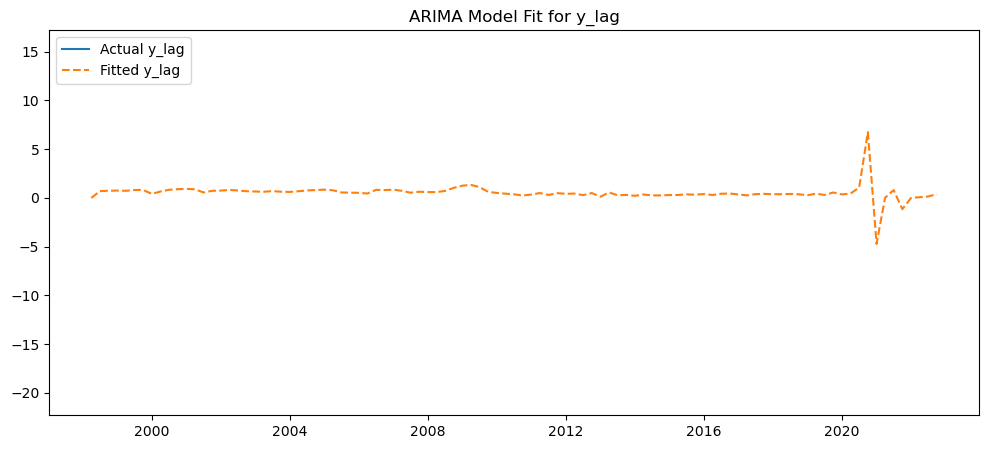

                               SARIMAX Results                                
Dep. Variable:                  y_lag   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -233.792
Date:                Thu, 06 Feb 2025   AIC                            473.584
Time:                        16:43:08   BIC                            481.339
Sample:                    04-01-1998   HQIC                           476.721
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3220      0.042     -7.617      0.000      -0.405      -0.239
ma.L1         -0.9998      2.849     -0.351      0.726      -6.584       4.584
sigma2         6.5520     18.414      0.356      0.7

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


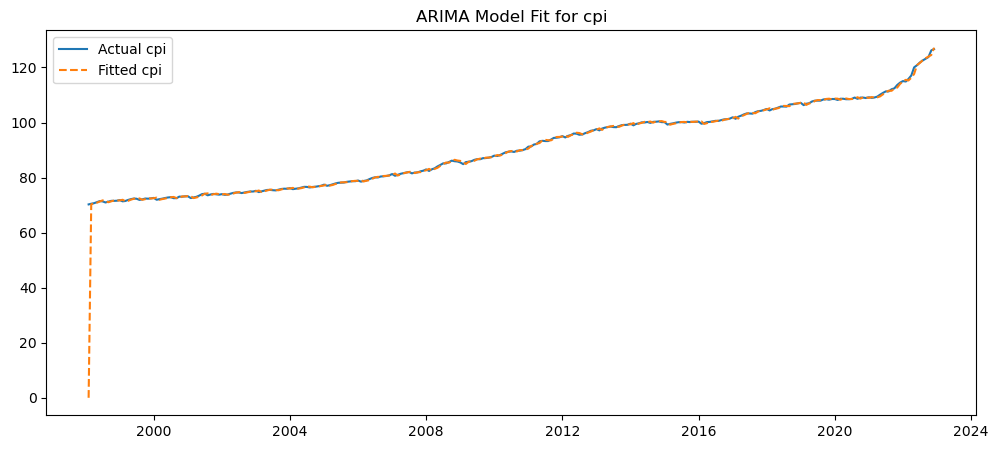

                               SARIMAX Results                                
Dep. Variable:                    cpi   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -124.302
Date:                Thu, 06 Feb 2025   AIC                            254.603
Time:                        16:43:08   BIC                            265.694
Sample:                    02-01-1998   HQIC                           259.043
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9957      0.012     84.792      0.000       0.973       1.019
ma.L1         -0.8791      0.042    -21.118      0.000      -0.961      -0.798
sigma2         0.1339      0.008     16.118      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


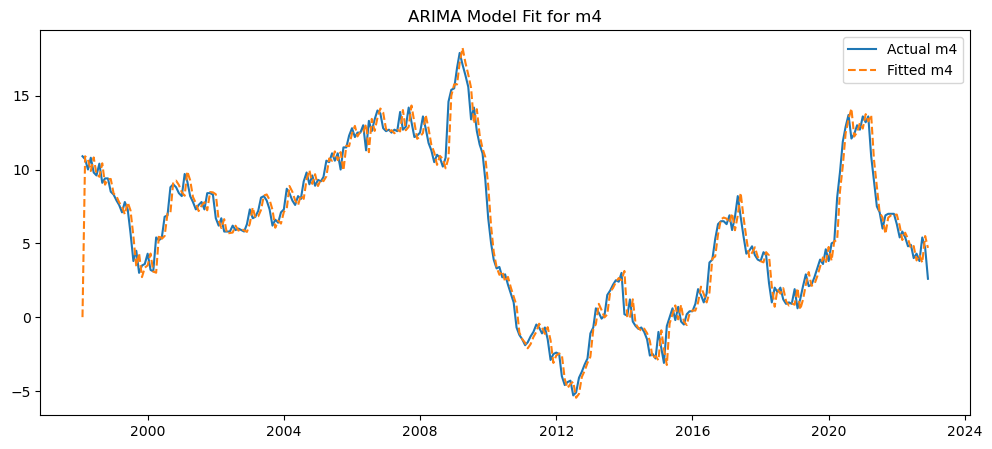

                               SARIMAX Results                                
Dep. Variable:                     m4   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -395.376
Date:                Thu, 06 Feb 2025   AIC                            796.752
Time:                        16:43:08   BIC                            807.844
Sample:                    02-01-1998   HQIC                           801.192
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8112      0.149      5.447      0.000       0.519       1.103
ma.L1         -0.7028      0.179     -3.922      0.000      -1.054      -0.352
sigma2         0.8315      0.055     15.051      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA 

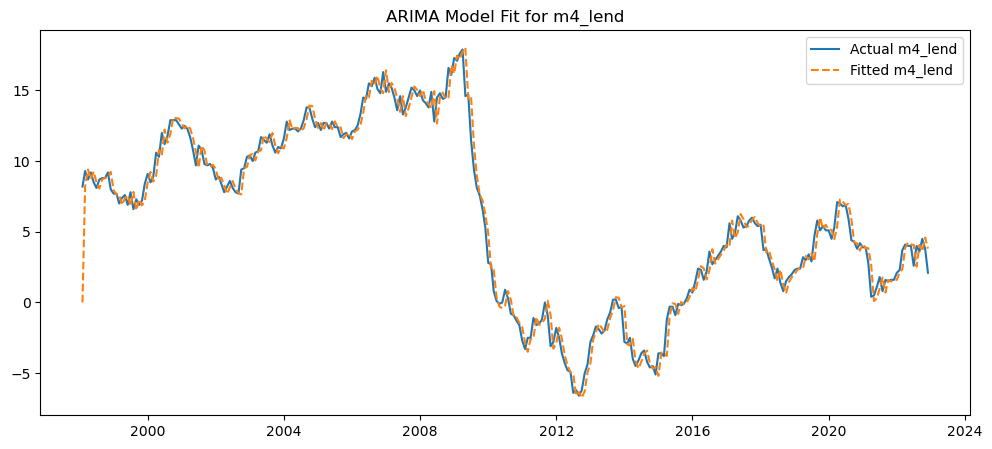

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                m4_lend   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -370.743
Date:                Thu, 06 Feb 2025   AIC                            747.485
Time:                        16:43:08   BIC                            758.577
Sample:                    02-01-1998   HQIC                           751.925
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8342      0.148      5.642      0.000       0.544       1.124
ma.L1         -0.7516      0.178     -4.229      0.000      -1.100      -0.403
sigma2         0.7048      0.046     15.364      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


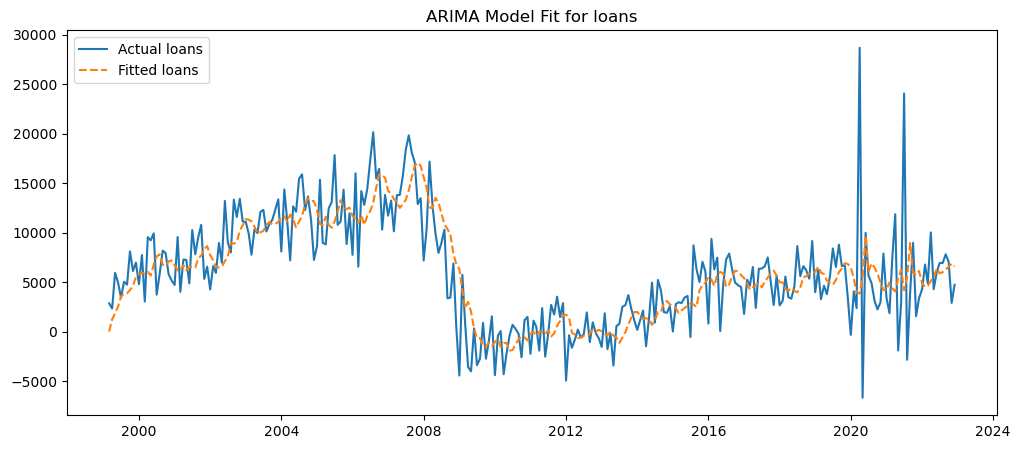

                               SARIMAX Results                                
Dep. Variable:                  loans   No. Observations:                  286
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2732.206
Date:                Thu, 06 Feb 2025   AIC                           5470.411
Time:                        16:43:08   BIC                           5481.369
Sample:                    03-01-1999   HQIC                          5474.804
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2216      0.057     -3.895      0.000      -0.333      -0.110
ma.L1         -0.6991      0.054    -12.944      0.000      -0.805      -0.593
sigma2      1.278e+07   4.85e+05     26.376      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


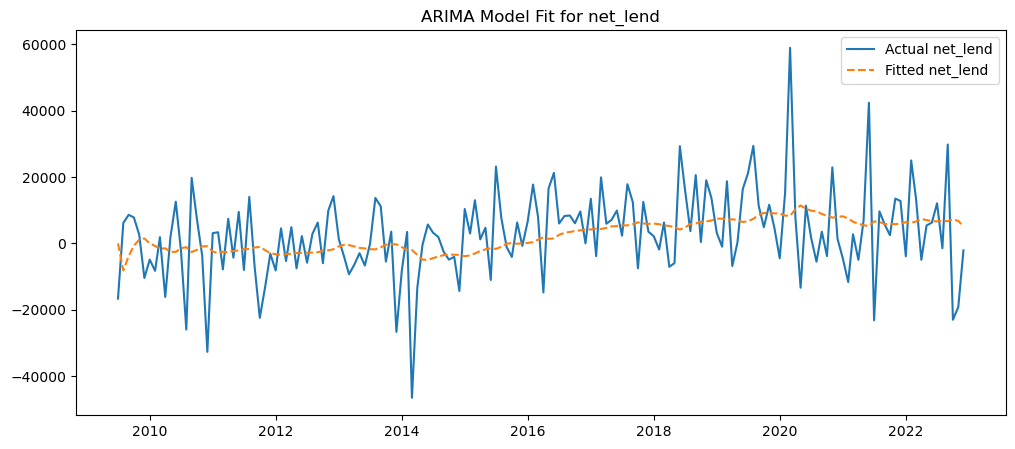

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               net_lend   No. Observations:                  162
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1750.832
Date:                Thu, 06 Feb 2025   AIC                           3507.663
Time:                        16:43:09   BIC                           3516.908
Sample:                    07-01-2009   HQIC                          3511.417
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0255      0.094     -0.271      0.786      -0.210       0.159
ma.L1         -0.9389      0.045    -20.977      0.000      -1.027      -0.851
sigma2       1.93e+08    5.4e-11   3.58e+18      0.0

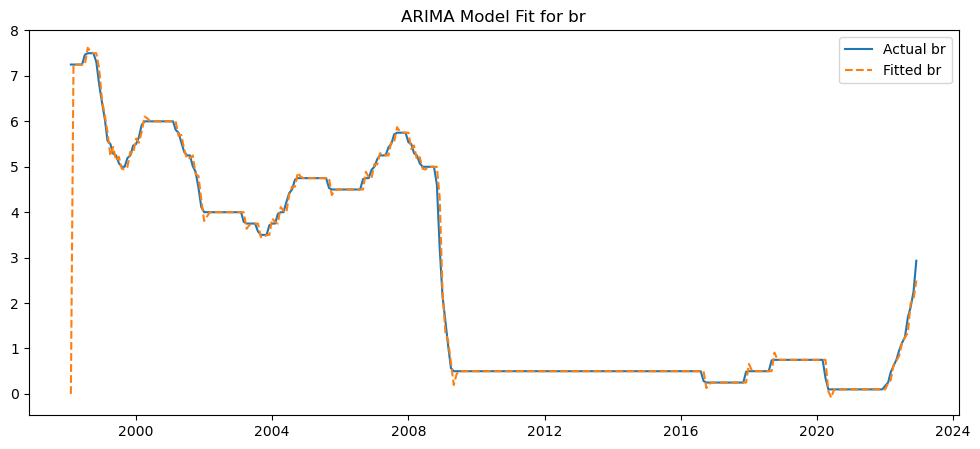

                               SARIMAX Results                                
Dep. Variable:                     br   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 222.994
Date:                Thu, 06 Feb 2025   AIC                           -439.987
Time:                        16:43:09   BIC                           -428.896
Sample:                    02-01-1998   HQIC                          -435.547
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7422      0.038     19.762      0.000       0.669       0.816
ma.L1         -0.0311      0.073     -0.424      0.671      -0.175       0.113
sigma2         0.0131      0.001     24.293      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


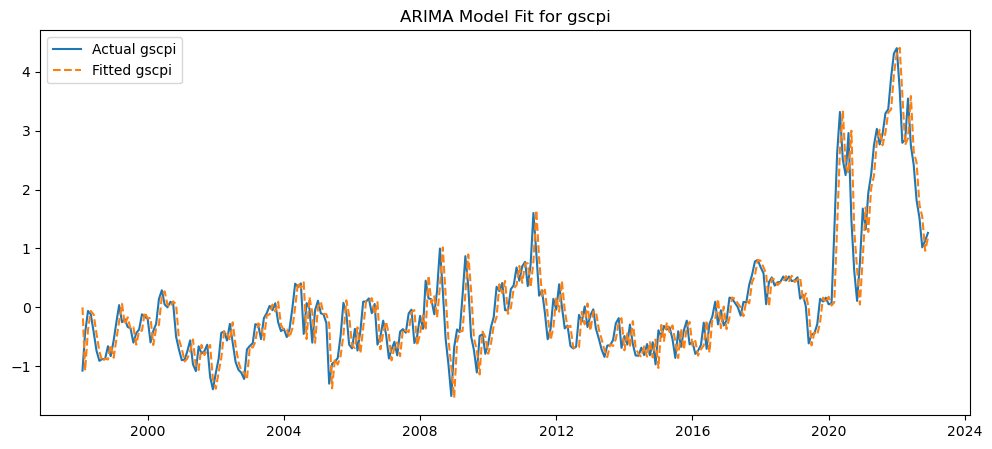

                               SARIMAX Results                                
Dep. Variable:                  gscpi   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -127.127
Date:                Thu, 06 Feb 2025   AIC                            260.253
Time:                        16:43:09   BIC                            271.345
Sample:                    02-01-1998   HQIC                           264.693
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5628      0.310     -1.813      0.070      -1.171       0.046
ma.L1          0.6497      0.301      2.160      0.031       0.060       1.239
sigma2         0.1374      0.009     14.581      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


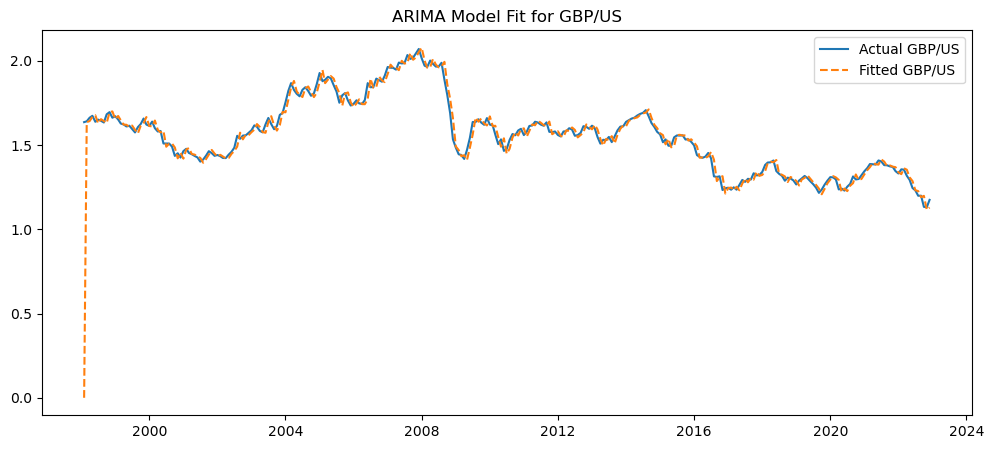

                               SARIMAX Results                                
Dep. Variable:                 GBP/US   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 607.958
Date:                Thu, 06 Feb 2025   AIC                          -1209.916
Time:                        16:43:09   BIC                          -1198.825
Sample:                    02-01-1998   HQIC                         -1205.476
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3209      0.196      1.639      0.101      -0.063       0.705
ma.L1         -0.0635      0.221     -0.288      0.773      -0.496       0.369
sigma2         0.0010   7.17e-05     13.802      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


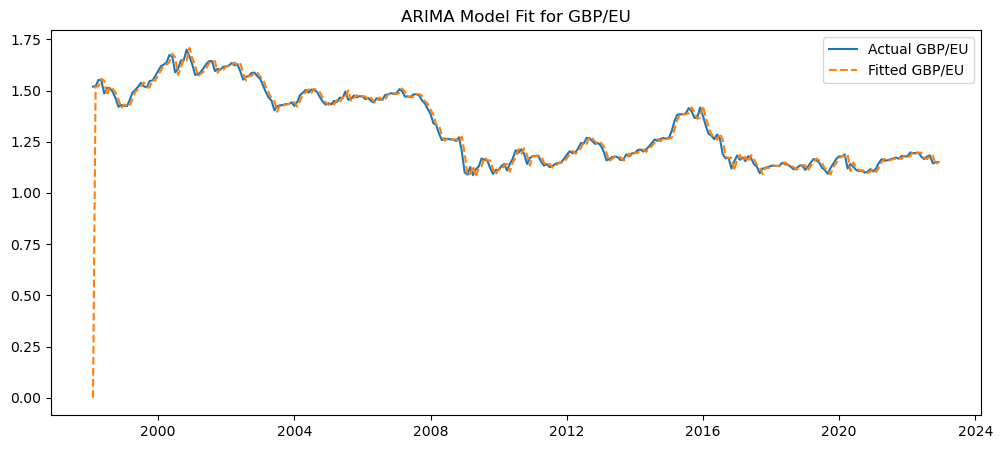

                               SARIMAX Results                                
Dep. Variable:                 GBP/EU   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 707.796
Date:                Thu, 06 Feb 2025   AIC                          -1409.592
Time:                        16:43:09   BIC                          -1398.500
Sample:                    02-01-1998   HQIC                         -1405.152
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1258      0.316     -0.398      0.691      -0.745       0.494
ma.L1          0.2929      0.304      0.965      0.335      -0.302       0.888
sigma2         0.0005   3.38e-05     14.961      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


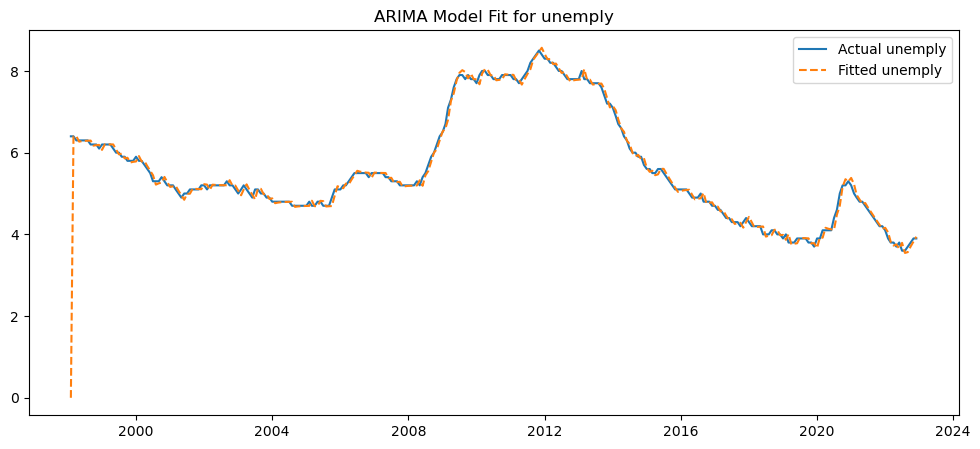

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                unemply   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 289.682
Date:                Thu, 06 Feb 2025   AIC                           -573.364
Time:                        16:43:09   BIC                           -562.273
Sample:                    02-01-1998   HQIC                          -568.925
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8648      0.044     19.445      0.000       0.778       0.952
ma.L1         -0.6139      0.070     -8.795      0.000      -0.751      -0.477
sigma2         0.0084      0.001     13.530      0.0

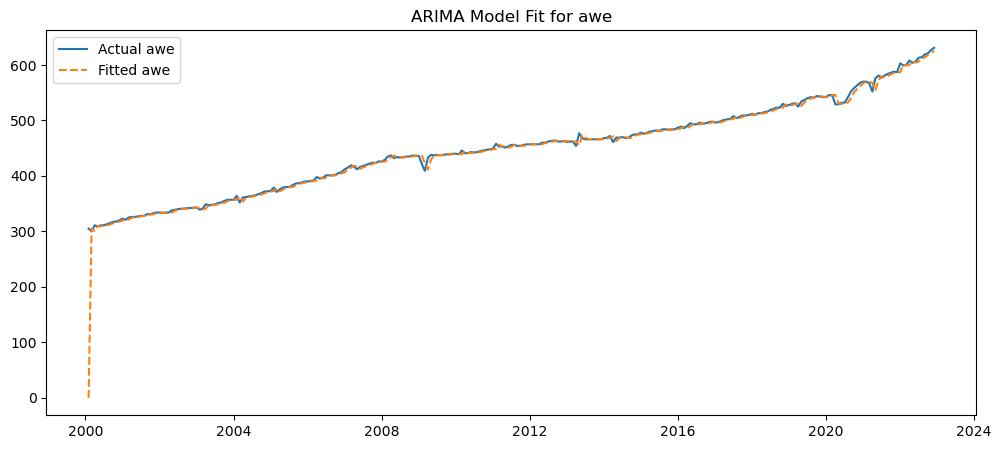

                               SARIMAX Results                                
Dep. Variable:                    awe   No. Observations:                  275
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -799.672
Date:                Thu, 06 Feb 2025   AIC                           1605.344
Time:                        16:43:09   BIC                           1616.183
Sample:                    02-01-2000   HQIC                          1609.694
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0071      0.299     -0.024      0.981      -0.592       0.578
ma.L1         -0.1590      0.294     -0.541      0.589      -0.735       0.417
sigma2        20.0662      0.969     20.718      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


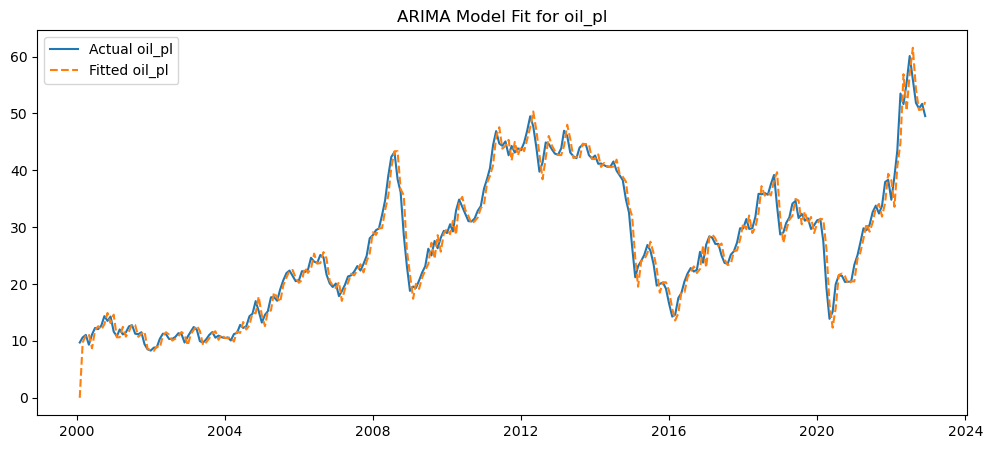

                               SARIMAX Results                                
Dep. Variable:                 oil_pl   No. Observations:                  275
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -578.717
Date:                Thu, 06 Feb 2025   AIC                           1163.434
Time:                        16:43:09   BIC                           1174.274
Sample:                    02-01-2000   HQIC                          1167.785
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2152      0.113      1.909      0.056      -0.006       0.436
ma.L1          0.1448      0.120      1.207      0.227      -0.090       0.380
sigma2         3.9982      0.257     15.534      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


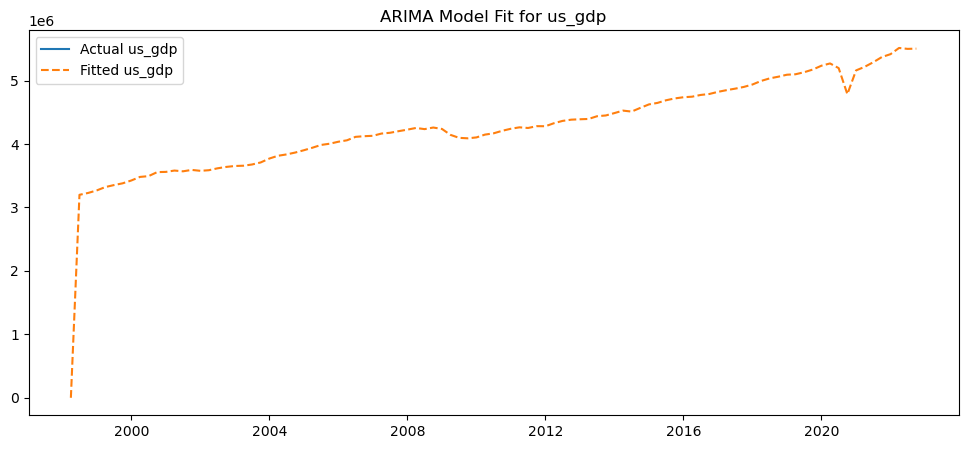

                               SARIMAX Results                                
Dep. Variable:                 us_gdp   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1221.972
Date:                Thu, 06 Feb 2025   AIC                           2449.943
Time:                        16:43:09   BIC                           2457.698
Sample:                    04-01-1998   HQIC                          2453.080
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.004    223.048      0.000       0.991       1.009
ma.L1         -0.9993      0.046    -21.843      0.000      -1.089      -0.910
sigma2      4.499e+09   1.05e-11   4.28e+20      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


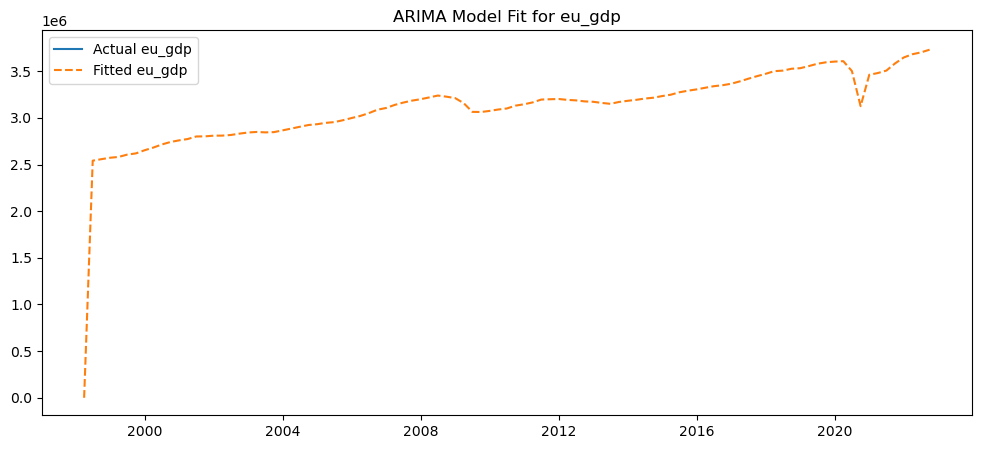

                               SARIMAX Results                                
Dep. Variable:                 eu_gdp   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1212.819
Date:                Thu, 06 Feb 2025   AIC                           2431.638
Time:                        16:43:09   BIC                           2439.393
Sample:                    04-01-1998   HQIC                          2434.775
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0249     32.796     -0.001      0.999     -64.304      64.254
ma.L1          0.0226     32.779      0.001      0.999     -64.222      64.268
sigma2       3.36e+09    5.2e-06   6.46e+14      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


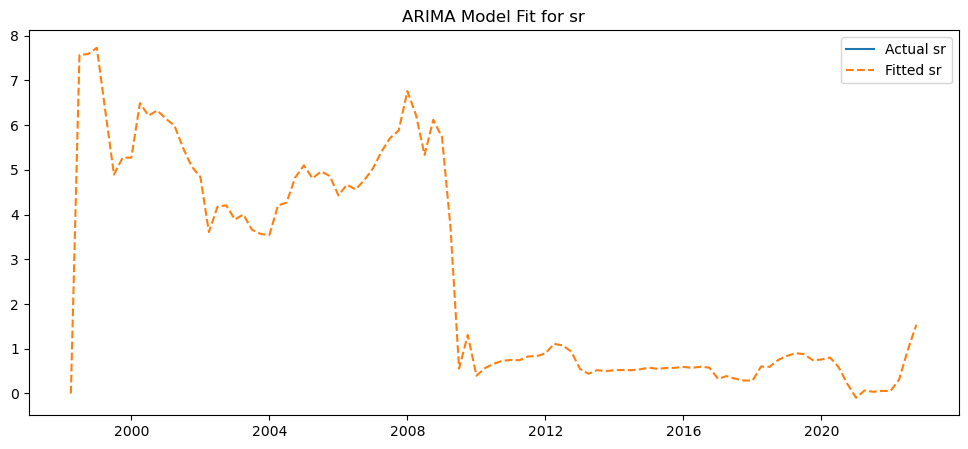

                               SARIMAX Results                                
Dep. Variable:                     sr   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -28.819
Date:                Thu, 06 Feb 2025   AIC                             63.639
Time:                        16:43:10   BIC                             71.394
Sample:                    04-01-1998   HQIC                            66.775
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4278      0.095      4.520      0.000       0.242       0.613
ma.L1          0.2843      0.124      2.301      0.021       0.042       0.526
sigma2         0.1049      0.009     12.187      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


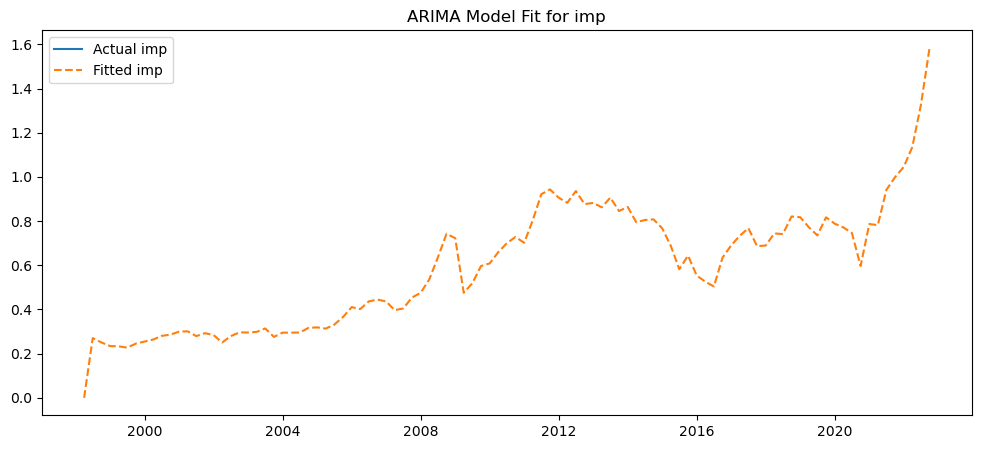

                               SARIMAX Results                                
Dep. Variable:                    imp   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 155.300
Date:                Thu, 06 Feb 2025   AIC                           -304.600
Time:                        16:43:10   BIC                           -296.845
Sample:                    04-01-1998   HQIC                          -301.463
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2982      0.204      1.464      0.143      -0.101       0.698
ma.L1          0.0919      0.247      0.373      0.709      -0.391       0.575
sigma2         0.0025      0.000     10.840      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


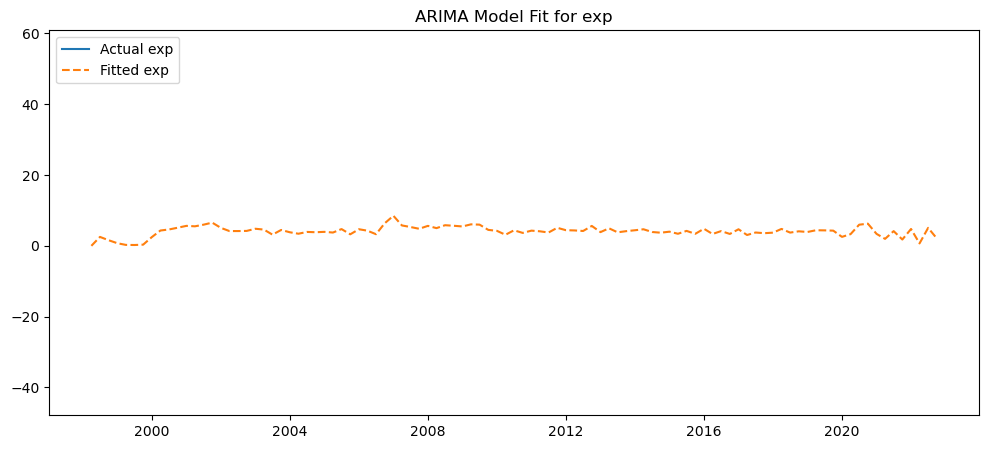

                               SARIMAX Results                                
Dep. Variable:                    exp   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -409.666
Date:                Thu, 06 Feb 2025   AIC                            825.332
Time:                        16:43:10   BIC                            833.086
Sample:                    04-01-1998   HQIC                           828.468
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0653      0.097     -0.670      0.503      -0.256       0.126
ma.L1         -0.9999      6.700     -0.149      0.881     -14.132      12.132
sigma2       238.5484   1599.584      0.149      0.8

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


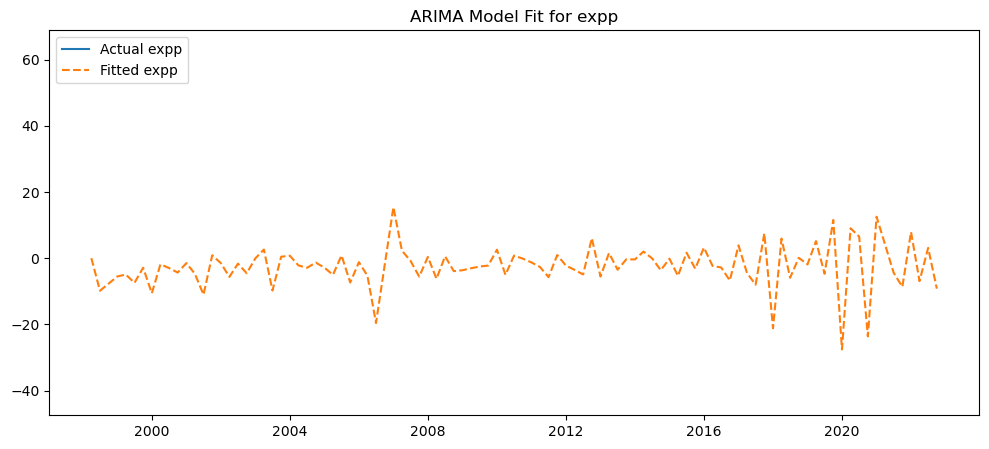

                               SARIMAX Results                                
Dep. Variable:                   expp   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -404.578
Date:                Thu, 06 Feb 2025   AIC                            815.156
Time:                        16:43:10   BIC                            822.911
Sample:                    04-01-1998   HQIC                           818.293
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4105      0.072     -5.722      0.000      -0.551      -0.270
ma.L1         -0.9960      0.207     -4.803      0.000      -1.402      -0.590
sigma2       214.1754     39.672      5.399      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


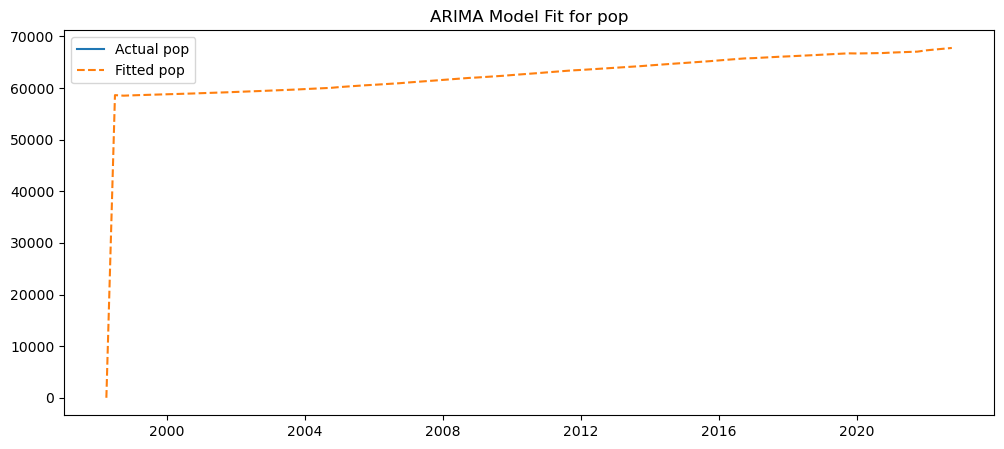

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    pop   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -407.256
Date:                Thu, 06 Feb 2025   AIC                            820.513
Time:                        16:43:10   BIC                            828.268
Sample:                    04-01-1998   HQIC                           823.650
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9710      0.015     64.056      0.000       0.941       1.001
ma.L1         -0.0339      0.245     -0.138      0.890      -0.514       0.447
sigma2       196.8281      8.053     24.441      0.0

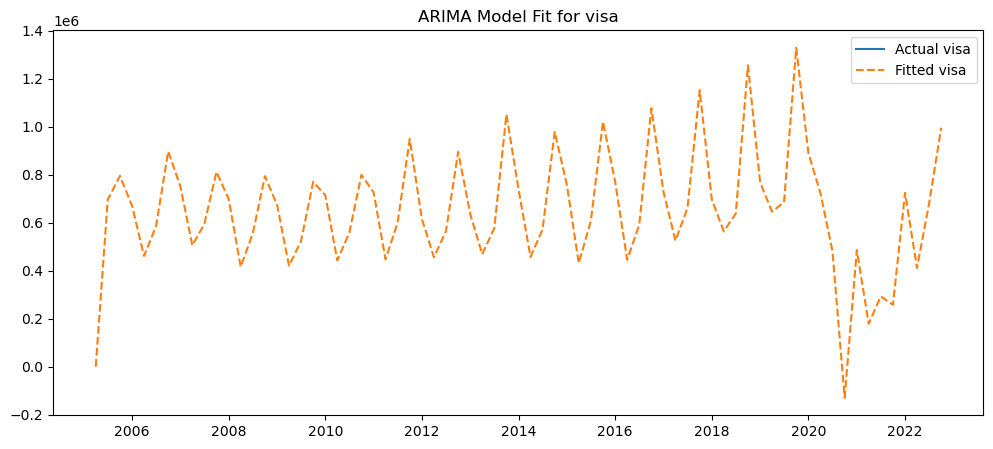

                               SARIMAX Results                                
Dep. Variable:                   visa   No. Observations:                   71
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -960.108
Date:                Thu, 06 Feb 2025   AIC                           1926.215
Time:                        16:43:10   BIC                           1932.961
Sample:                    04-01-2005   HQIC                          1928.895
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3396      0.264     -1.286      0.198      -0.857       0.178
ma.L1          0.6892      0.208      3.310      0.001       0.281       1.097
sigma2      5.583e+10   1.47e-12    3.8e+22      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


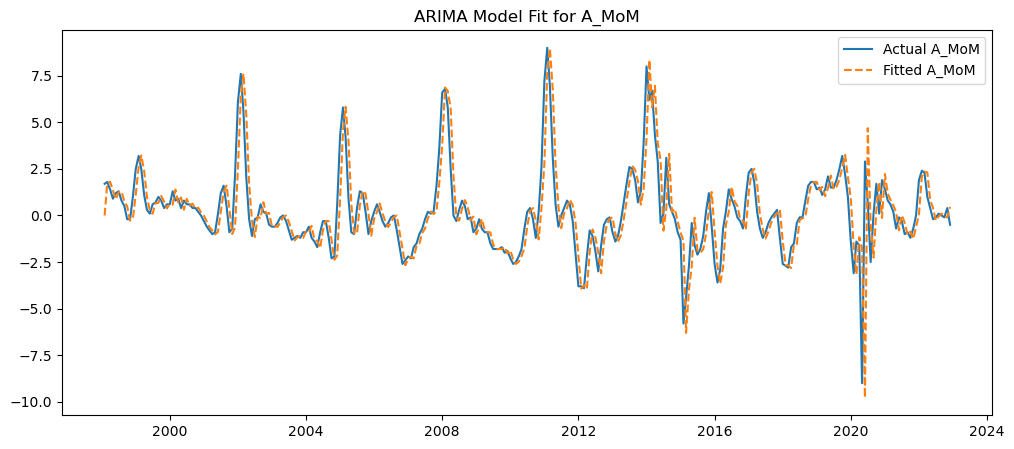

                               SARIMAX Results                                
Dep. Variable:                  A_MoM   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -532.228
Date:                Thu, 06 Feb 2025   AIC                           1070.455
Time:                        16:43:10   BIC                           1081.547
Sample:                    02-01-1998   HQIC                          1074.895
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4032      0.244     -1.650      0.099      -0.882       0.076
ma.L1          0.5190      0.235      2.207      0.027       0.058       0.980
sigma2         2.0835      0.074     27.984      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


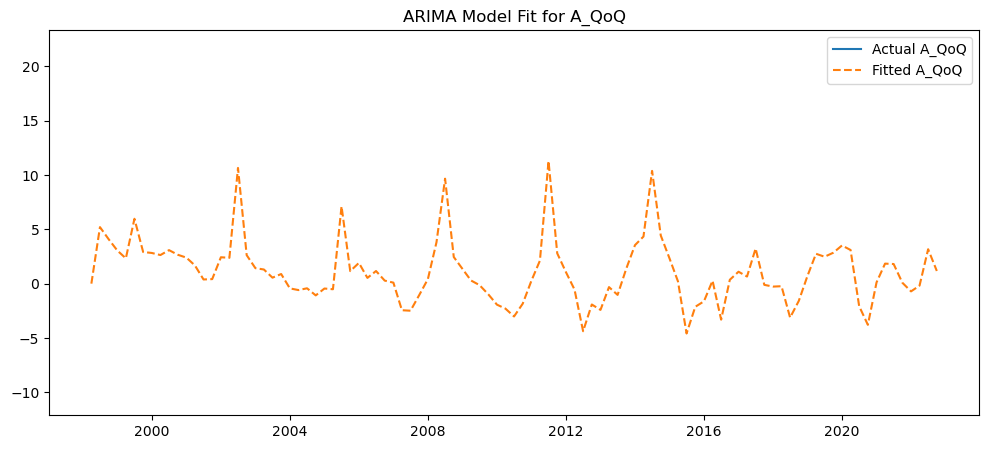

                               SARIMAX Results                                
Dep. Variable:                  A_QoQ   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -297.921
Date:                Thu, 06 Feb 2025   AIC                            601.842
Time:                        16:43:10   BIC                            609.597
Sample:                    04-01-1998   HQIC                           604.979
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4838      0.086      5.640      0.000       0.316       0.652
ma.L1         -0.9997      5.850     -0.171      0.864     -12.465      10.466
sigma2        24.6819    144.669      0.171      0.8

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


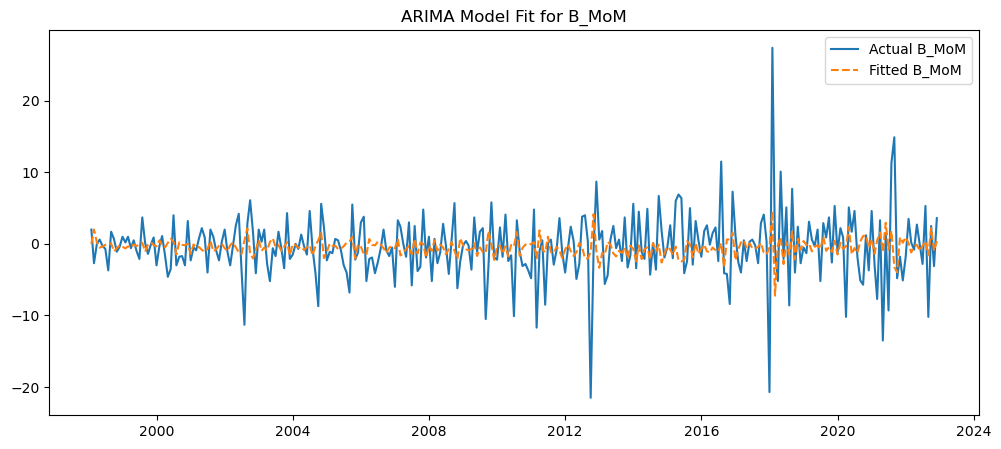

                               SARIMAX Results                                
Dep. Variable:                  B_MoM   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -865.360
Date:                Thu, 06 Feb 2025   AIC                           1736.720
Time:                        16:43:10   BIC                           1747.811
Sample:                    02-01-1998   HQIC                          1741.159
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2496      0.033     -7.457      0.000      -0.315      -0.184
ma.L1         -0.9906      0.011    -92.632      0.000      -1.012      -0.970
sigma2        19.1988      0.860     22.314      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


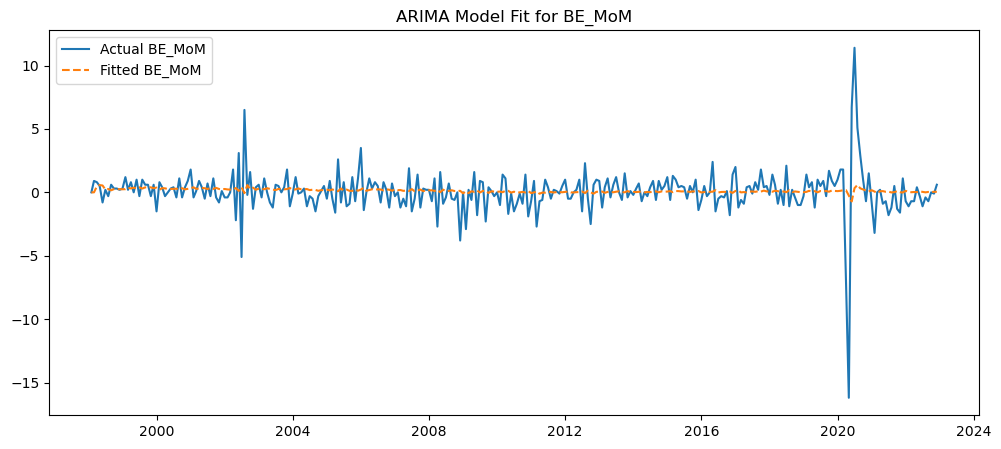

                               SARIMAX Results                                
Dep. Variable:                 BE_MoM   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -590.227
Date:                Thu, 06 Feb 2025   AIC                           1186.453
Time:                        16:43:11   BIC                           1197.544
Sample:                    02-01-1998   HQIC                          1190.893
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0447      0.022      1.995      0.046       0.001       0.089
ma.L1         -1.0000      8.411     -0.119      0.905     -17.484      15.484
sigma2         3.0179     25.375      0.119      0.9

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


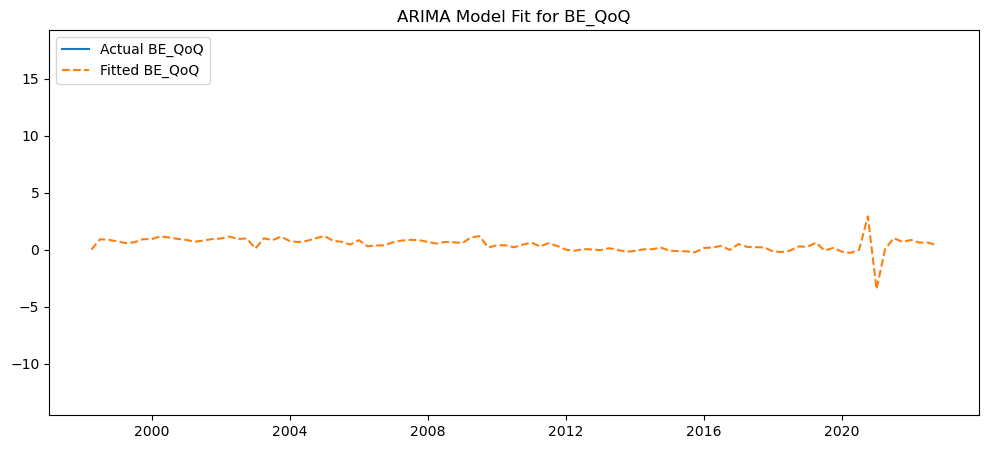

                               SARIMAX Results                                
Dep. Variable:                 BE_QoQ   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -232.515
Date:                Thu, 06 Feb 2025   AIC                            471.029
Time:                        16:43:11   BIC                            478.784
Sample:                    04-01-1998   HQIC                           474.166
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2136      0.051     -4.228      0.000      -0.313      -0.115
ma.L1         -0.9992      1.685     -0.593      0.553      -4.301       2.303
sigma2         6.4041     10.577      0.605      0.5

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


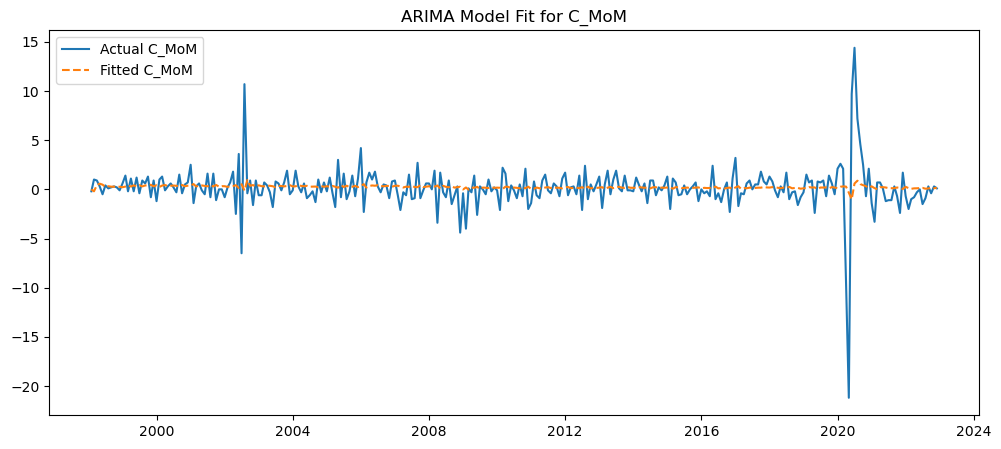

                               SARIMAX Results                                
Dep. Variable:                  C_MoM   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -665.395
Date:                Thu, 06 Feb 2025   AIC                           1336.791
Time:                        16:43:11   BIC                           1347.882
Sample:                    02-01-1998   HQIC                          1341.230
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0507      0.019      2.712      0.007       0.014       0.087
ma.L1         -0.9999      1.171     -0.854      0.393      -3.295       1.295
sigma2         4.9984      5.826      0.858      0.3

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


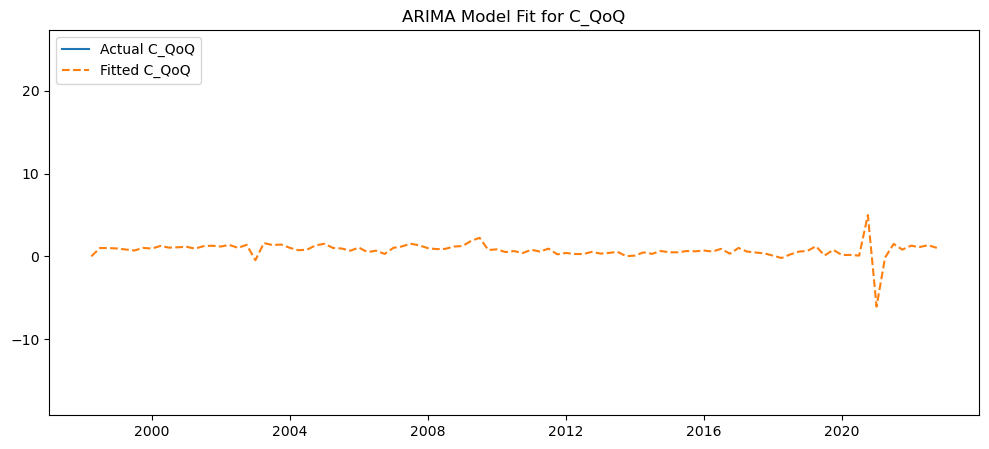

                               SARIMAX Results                                
Dep. Variable:                  C_QoQ   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -259.367
Date:                Thu, 06 Feb 2025   AIC                            524.733
Time:                        16:43:11   BIC                            532.488
Sample:                    04-01-1998   HQIC                           527.870
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2668      0.043     -6.169      0.000      -0.352      -0.182
ma.L1         -0.9998      4.330     -0.231      0.817      -9.487       7.488
sigma2        11.0590     47.666      0.232      0.8

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


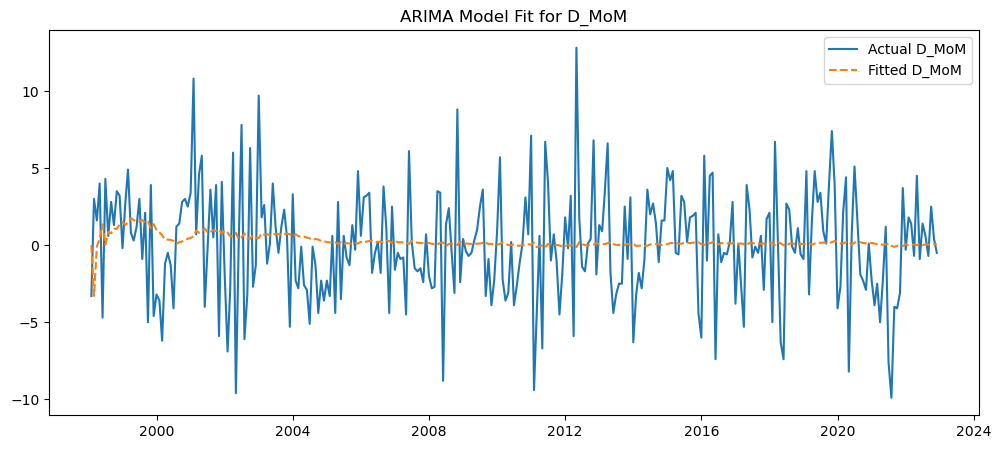

                               SARIMAX Results                                
Dep. Variable:                  D_MoM   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -804.689
Date:                Thu, 06 Feb 2025   AIC                           1615.378
Time:                        16:43:11   BIC                           1626.470
Sample:                    02-01-1998   HQIC                          1619.818
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0139      0.057      0.246      0.806      -0.097       0.125
ma.L1         -0.9999      1.001     -0.999      0.318      -2.962       0.962
sigma2        12.7280     12.722      1.000      0.3

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


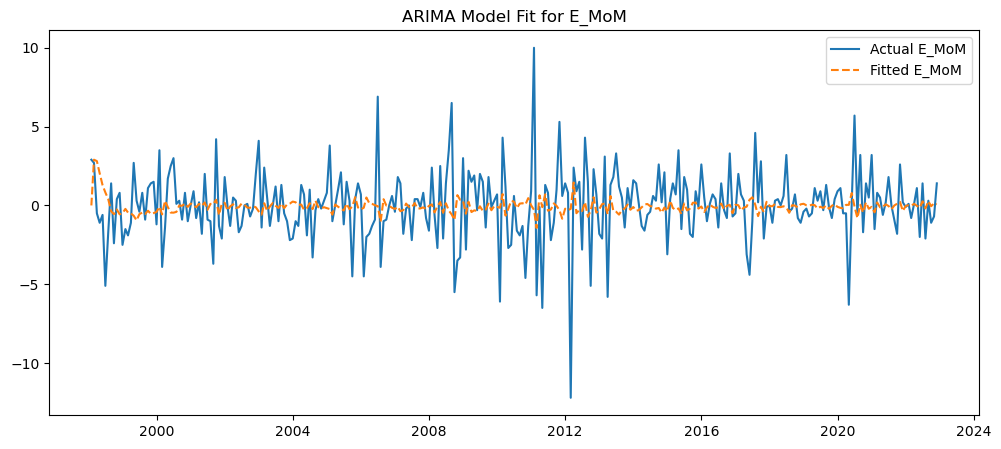

                               SARIMAX Results                                
Dep. Variable:                  E_MoM   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -664.574
Date:                Thu, 06 Feb 2025   AIC                           1335.148
Time:                        16:43:11   BIC                           1346.239
Sample:                    02-01-1998   HQIC                          1339.588
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1339      0.053     -2.508      0.012      -0.239      -0.029
ma.L1         -0.9997      0.401     -2.494      0.013      -1.785      -0.214
sigma2         4.9659      1.982      2.506      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


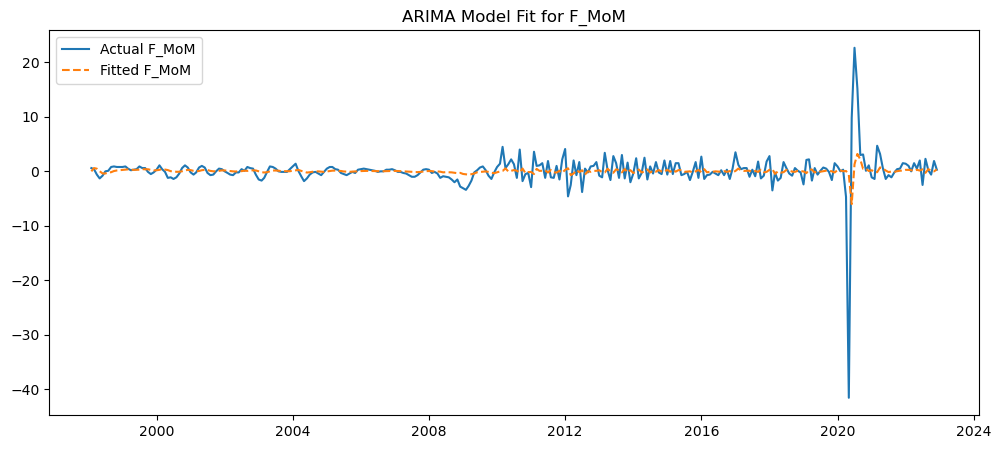

                               SARIMAX Results                                
Dep. Variable:                  F_MoM   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -773.144
Date:                Thu, 06 Feb 2025   AIC                           1552.288
Time:                        16:43:11   BIC                           1563.379
Sample:                    02-01-1998   HQIC                          1556.727
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1411      0.017      8.247      0.000       0.108       0.175
ma.L1         -0.9997      0.351     -2.852      0.004      -1.687      -0.313
sigma2        10.3096      3.521      2.928      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


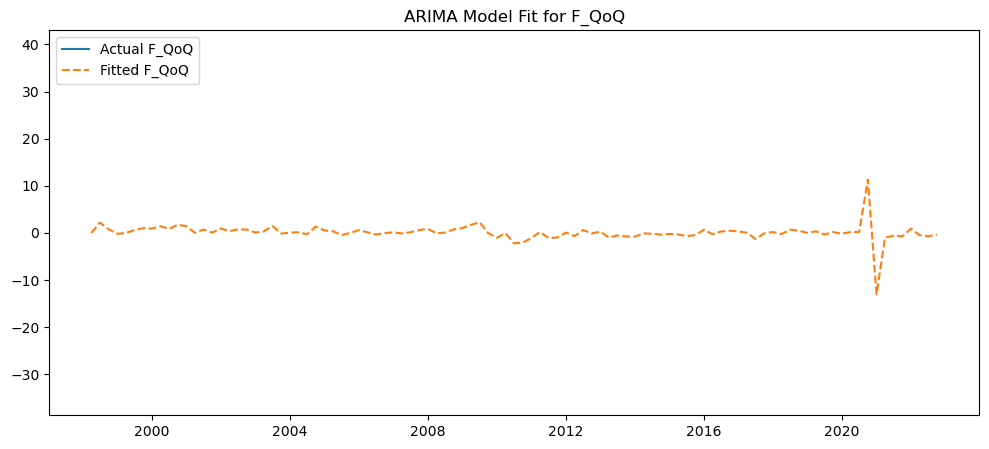

                               SARIMAX Results                                
Dep. Variable:                  F_QoQ   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -306.301
Date:                Thu, 06 Feb 2025   AIC                            618.602
Time:                        16:43:11   BIC                            626.356
Sample:                    04-01-1998   HQIC                           621.738
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3319      0.046     -7.288      0.000      -0.421      -0.243
ma.L1         -0.9998      9.158     -0.109      0.913     -18.948      16.949
sigma2        28.7734    262.579      0.110      0.9

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


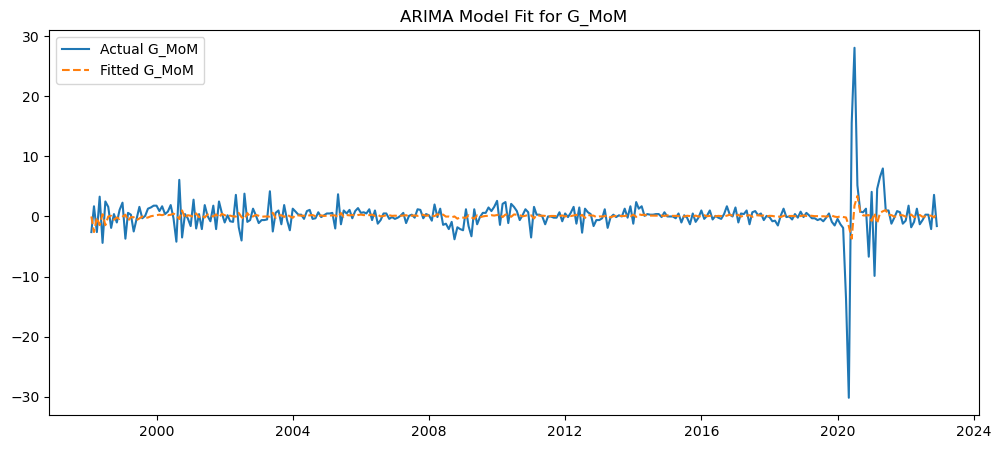

                               SARIMAX Results                                
Dep. Variable:                  G_MoM   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -768.828
Date:                Thu, 06 Feb 2025   AIC                           1543.655
Time:                        16:43:12   BIC                           1554.747
Sample:                    02-01-1998   HQIC                          1548.095
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1191      0.016      7.279      0.000       0.087       0.151
ma.L1         -0.9999      0.711     -1.407      0.159      -2.393       0.393
sigma2        10.0119      7.137      1.403      0.1

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


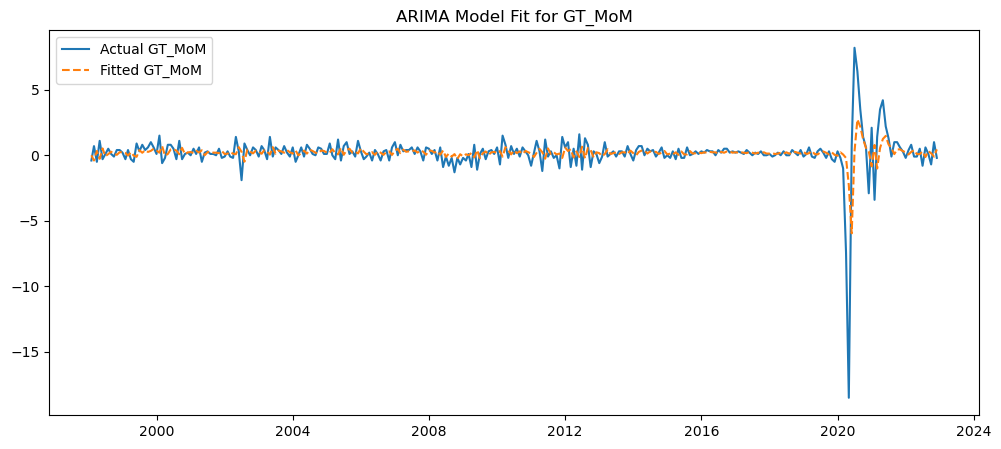

                               SARIMAX Results                                
Dep. Variable:                 GT_MoM   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -527.274
Date:                Thu, 06 Feb 2025   AIC                           1060.547
Time:                        16:43:12   BIC                           1071.638
Sample:                    02-01-1998   HQIC                          1064.987
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3236      0.020     16.593      0.000       0.285       0.362
ma.L1         -0.9998      0.233     -4.283      0.000      -1.457      -0.542
sigma2         1.9822      0.450      4.409      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


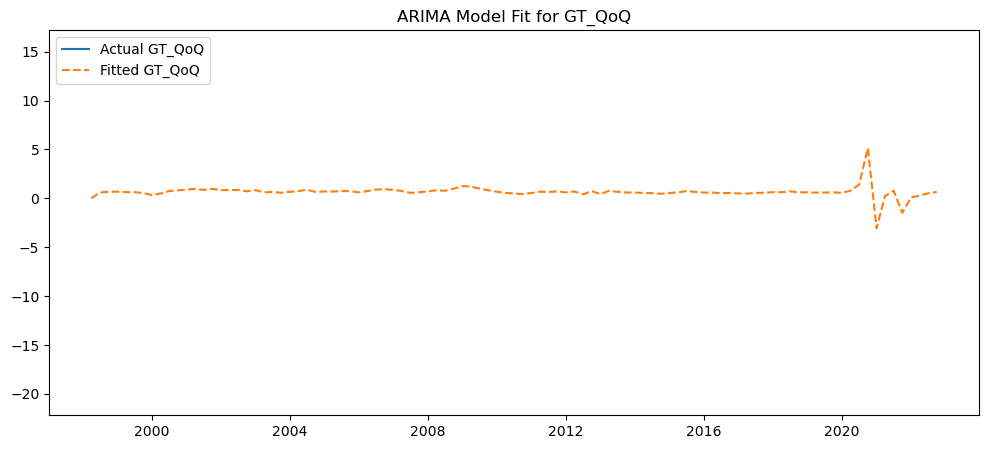

                               SARIMAX Results                                
Dep. Variable:                 GT_QoQ   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -240.796
Date:                Thu, 06 Feb 2025   AIC                            487.592
Time:                        16:43:12   BIC                            495.347
Sample:                    04-01-1998   HQIC                           490.729
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2326      0.052     -4.441      0.000      -0.335      -0.130
ma.L1         -0.9997      1.836     -0.544      0.586      -4.598       2.599
sigma2         7.5757     13.619      0.556      0.5

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


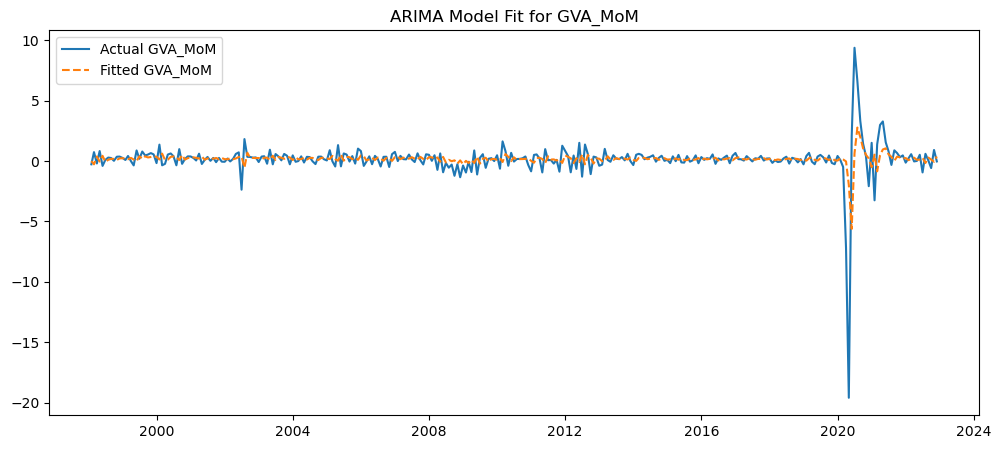

                               SARIMAX Results                                
Dep. Variable:                GVA_MoM   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -539.543
Date:                Thu, 06 Feb 2025   AIC                           1085.086
Time:                        16:43:12   BIC                           1096.177
Sample:                    02-01-1998   HQIC                          1089.525
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2874      0.018     15.908      0.000       0.252       0.323
ma.L1         -1.0000      2.818     -0.355      0.723      -6.524       4.524
sigma2         2.1513      6.047      0.356      0.7

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


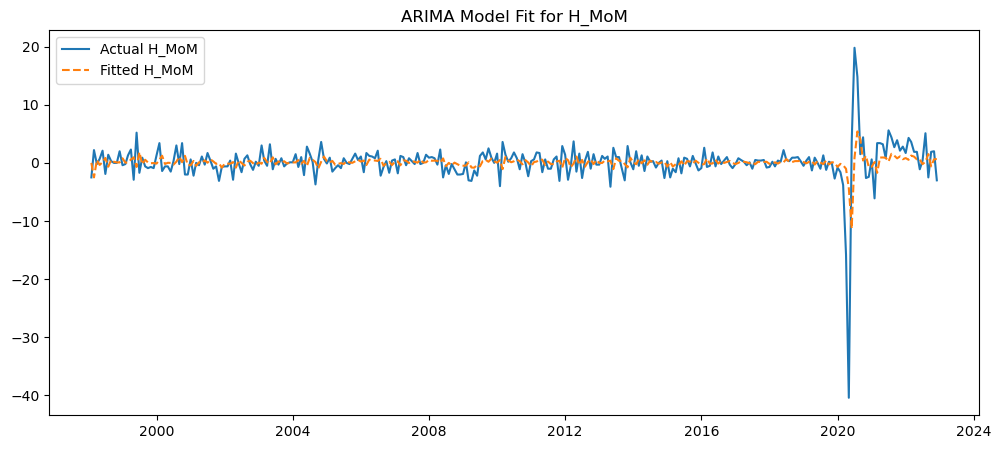

                               SARIMAX Results                                
Dep. Variable:                  H_MoM   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -776.331
Date:                Thu, 06 Feb 2025   AIC                           1558.662
Time:                        16:43:12   BIC                           1569.753
Sample:                    02-01-1998   HQIC                          1563.101
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2751      0.020     13.551      0.000       0.235       0.315
ma.L1         -0.9999      0.799     -1.251      0.211      -2.566       0.566
sigma2        10.5405      8.356      1.261      0.2

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA 

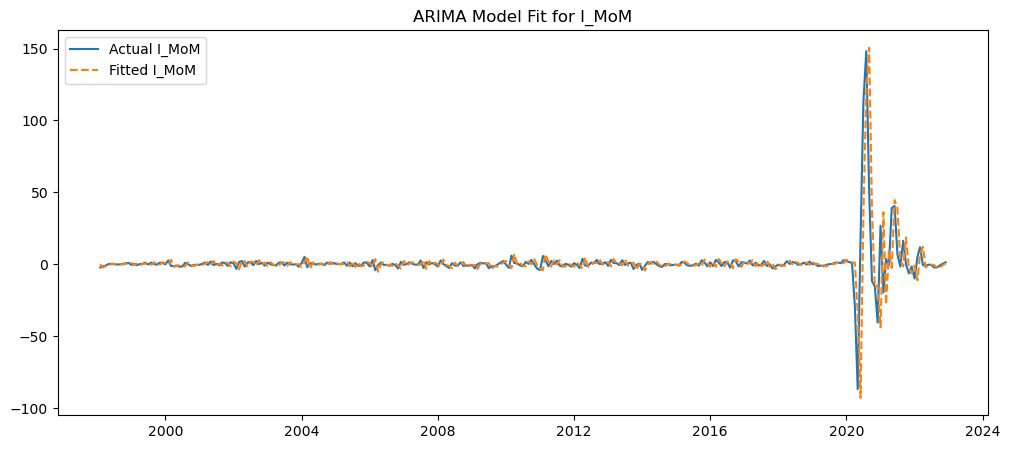

                               SARIMAX Results                                
Dep. Variable:                  I_MoM   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1189.962
Date:                Thu, 06 Feb 2025   AIC                           2385.923
Time:                        16:43:12   BIC                           2397.015
Sample:                    02-01-1998   HQIC                          2390.363
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1569      0.213     -0.735      0.462      -0.575       0.262
ma.L1          0.2811      0.209      1.344      0.179      -0.129       0.691
sigma2       172.1539      3.794     45.380      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


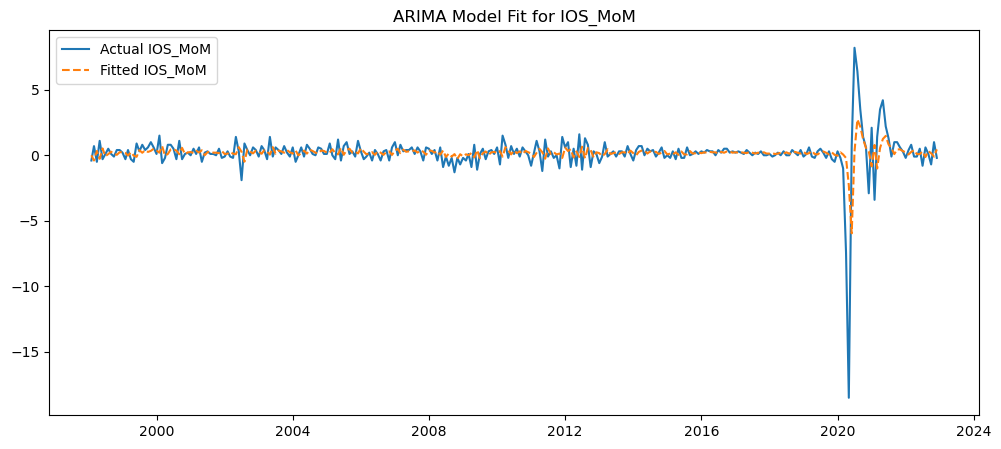

                               SARIMAX Results                                
Dep. Variable:                IOS_MoM   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -527.274
Date:                Thu, 06 Feb 2025   AIC                           1060.547
Time:                        16:43:12   BIC                           1071.638
Sample:                    02-01-1998   HQIC                          1064.987
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3236      0.020     16.593      0.000       0.285       0.362
ma.L1         -0.9998      0.233     -4.283      0.000      -1.457      -0.542
sigma2         1.9822      0.450      4.409      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


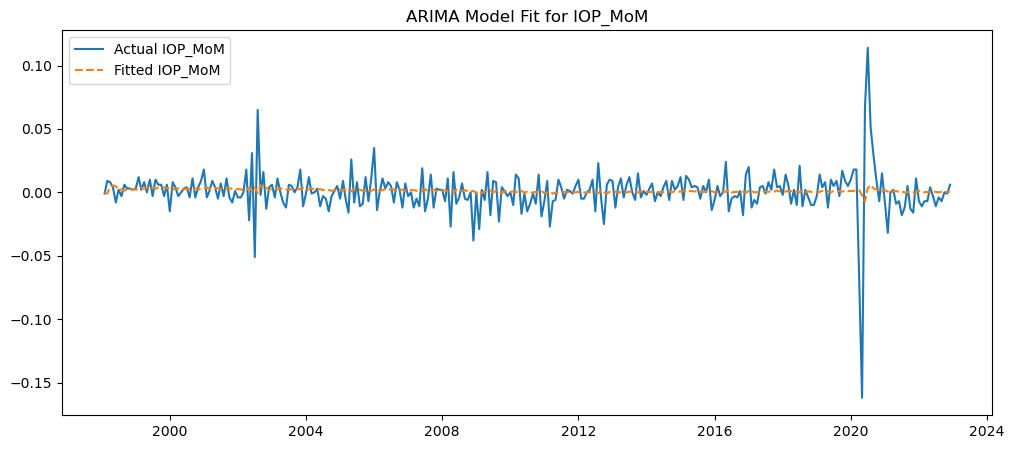

                               SARIMAX Results                                
Dep. Variable:                IOP_MoM   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 782.123
Date:                Thu, 06 Feb 2025   AIC                          -1558.246
Time:                        16:43:12   BIC                          -1547.155
Sample:                    02-01-1998   HQIC                         -1553.806
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0445      0.022      1.983      0.047       0.001       0.088
ma.L1         -0.9999      1.415     -0.707      0.480      -3.773       1.774
sigma2         0.0003      0.000      0.708      0.4

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


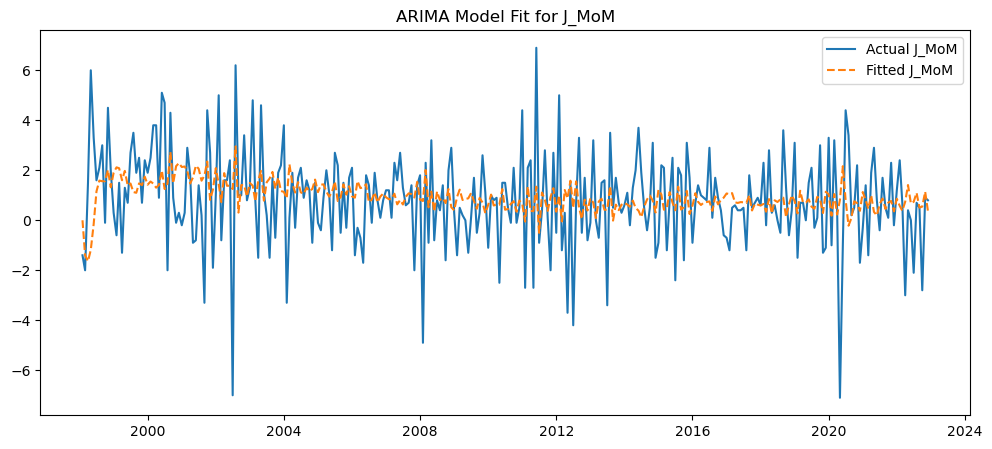

                               SARIMAX Results                                
Dep. Variable:                  J_MoM   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -611.590
Date:                Thu, 06 Feb 2025   AIC                           1229.181
Time:                        16:43:12   BIC                           1240.272
Sample:                    02-01-1998   HQIC                          1233.620
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2080      0.054     -3.842      0.000      -0.314      -0.102
ma.L1         -0.9728      0.019    -51.420      0.000      -1.010      -0.936
sigma2         3.5097      0.200     17.536      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


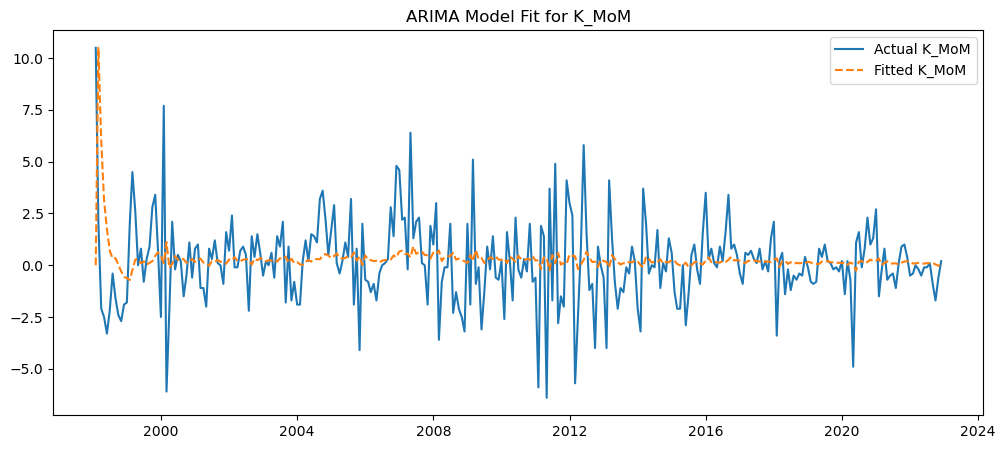

                               SARIMAX Results                                
Dep. Variable:                  K_MoM   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -633.809
Date:                Thu, 06 Feb 2025   AIC                           1273.619
Time:                        16:43:13   BIC                           1284.710
Sample:                    02-01-1998   HQIC                          1278.058
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0705      0.044      1.590      0.112      -0.016       0.157
ma.L1         -0.9945      0.021    -46.795      0.000      -1.036      -0.953
sigma2         4.0607      0.243     16.702      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


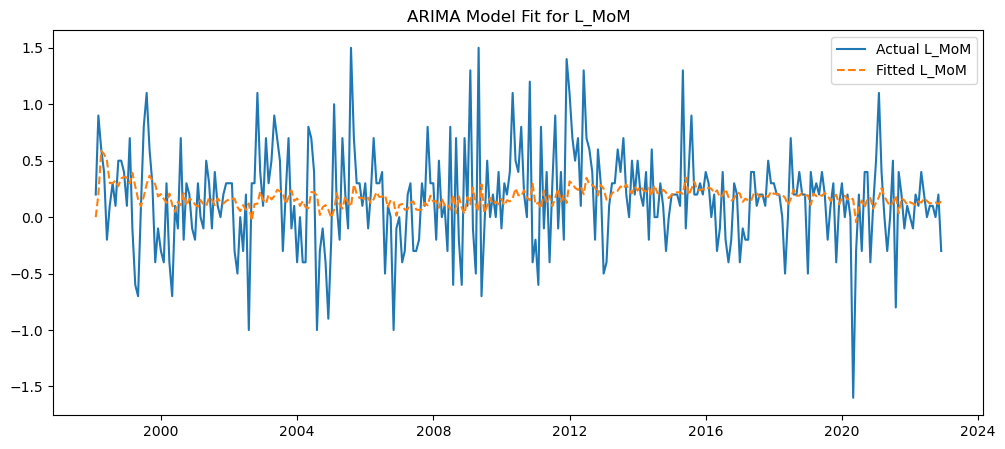

                               SARIMAX Results                                
Dep. Variable:                  L_MoM   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -180.278
Date:                Thu, 06 Feb 2025   AIC                            366.555
Time:                        16:43:13   BIC                            377.647
Sample:                    02-01-1998   HQIC                           370.995
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1076      0.057      1.875      0.061      -0.005       0.220
ma.L1         -0.9851      0.015    -64.121      0.000      -1.015      -0.955
sigma2         0.1942      0.012     15.599      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


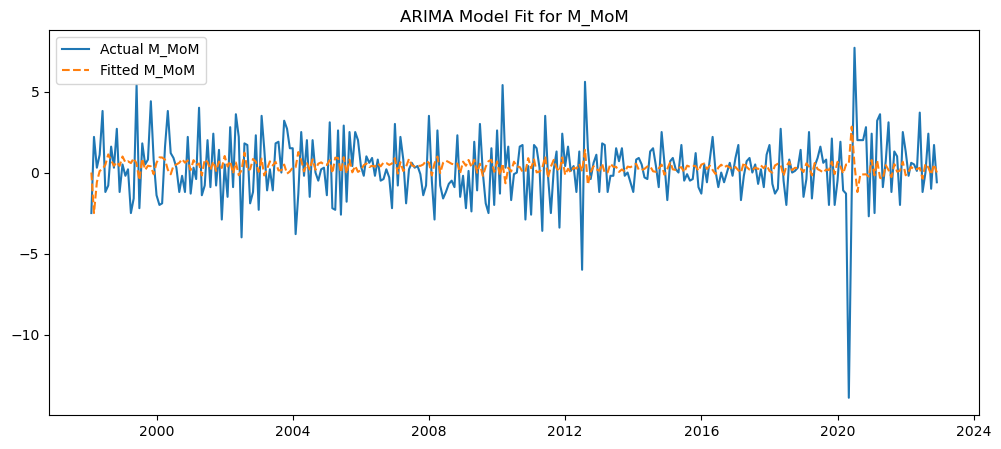

                               SARIMAX Results                                
Dep. Variable:                  M_MoM   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -623.936
Date:                Thu, 06 Feb 2025   AIC                           1253.872
Time:                        16:43:13   BIC                           1264.963
Sample:                    02-01-1998   HQIC                          1258.312
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1874      0.046     -4.079      0.000      -0.277      -0.097
ma.L1         -0.9996      0.157     -6.381      0.000      -1.307      -0.693
sigma2         3.7794      0.532      7.110      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


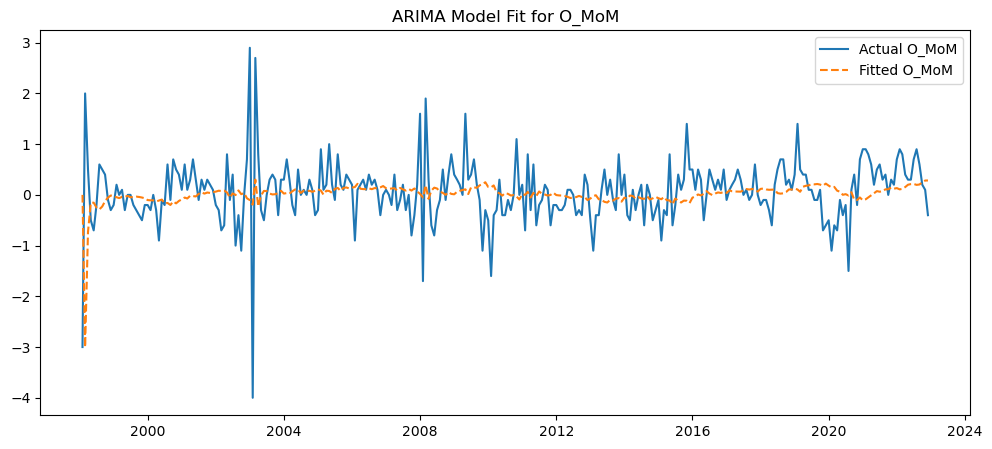

                               SARIMAX Results                                
Dep. Variable:                  O_MoM   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -285.957
Date:                Thu, 06 Feb 2025   AIC                            577.914
Time:                        16:43:13   BIC                            589.005
Sample:                    02-01-1998   HQIC                           582.354
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0924      0.032     -2.920      0.003      -0.154      -0.030
ma.L1         -0.9629      0.025    -38.023      0.000      -1.013      -0.913
sigma2         0.3953      0.020     19.777      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


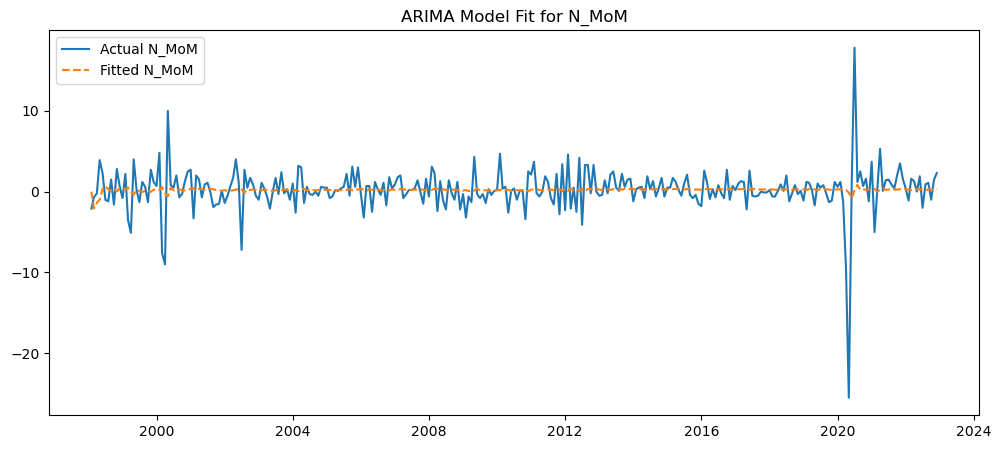

                               SARIMAX Results                                
Dep. Variable:                  N_MoM   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -722.080
Date:                Thu, 06 Feb 2025   AIC                           1450.161
Time:                        16:43:13   BIC                           1461.252
Sample:                    02-01-1998   HQIC                          1454.601
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0362      0.045      0.800      0.424      -0.052       0.125
ma.L1         -0.9998      0.469     -2.134      0.033      -1.918      -0.081
sigma2         7.3124      3.455      2.116      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


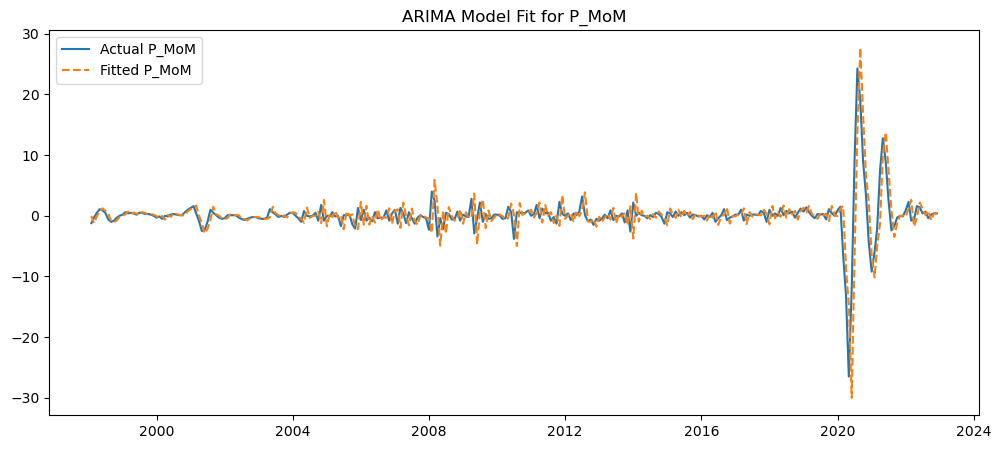

                               SARIMAX Results                                
Dep. Variable:                  P_MoM   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -704.395
Date:                Thu, 06 Feb 2025   AIC                           1414.791
Time:                        16:43:13   BIC                           1425.882
Sample:                    02-01-1998   HQIC                          1419.230
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0769      0.070      1.106      0.269      -0.059       0.213
ma.L1          0.2090      0.070      2.982      0.003       0.072       0.346
sigma2         6.6149      0.193     34.246      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


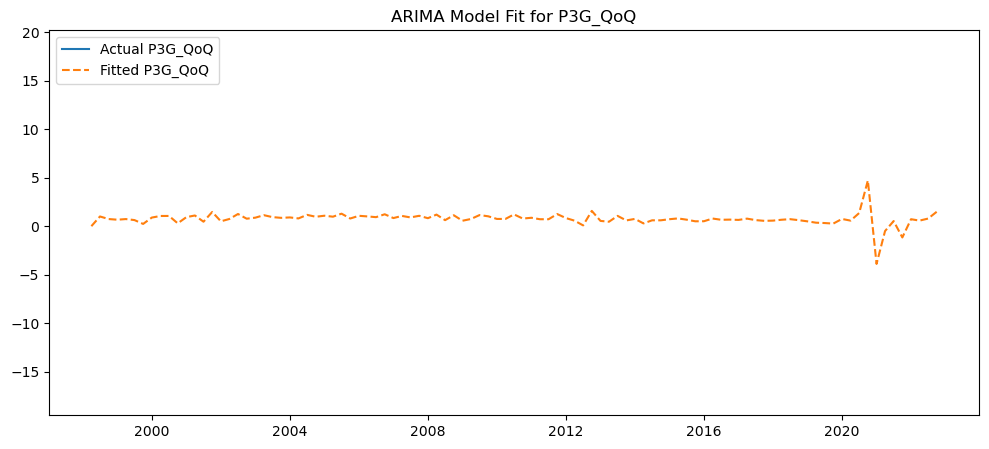

                               SARIMAX Results                                
Dep. Variable:                P3G_QoQ   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -244.512
Date:                Thu, 06 Feb 2025   AIC                            495.023
Time:                        16:43:13   BIC                            502.778
Sample:                    04-01-1998   HQIC                           498.160
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2425      0.035     -6.869      0.000      -0.312      -0.173
ma.L1         -0.9998      2.160     -0.463      0.643      -5.233       3.233
sigma2         8.1690     17.470      0.468      0.6

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


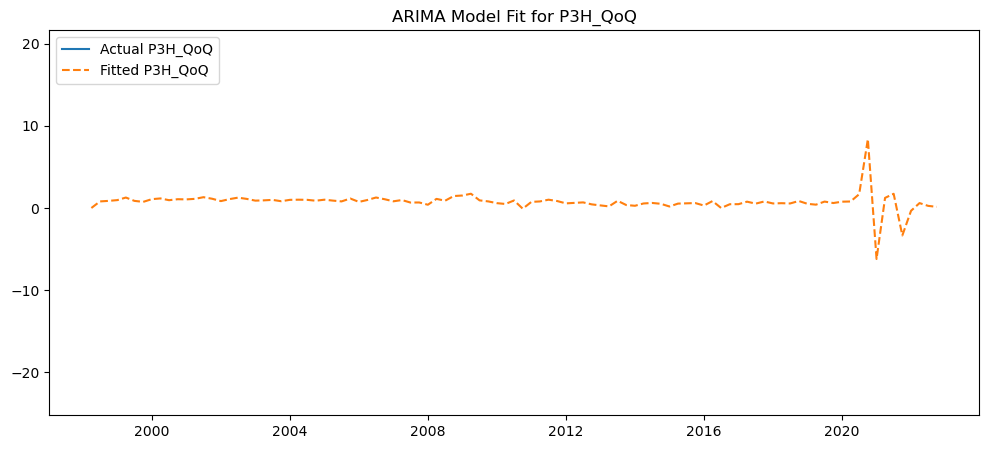

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                P3H_QoQ   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -255.118
Date:                Thu, 06 Feb 2025   AIC                            516.236
Time:                        16:43:13   BIC                            523.991
Sample:                    04-01-1998   HQIC                           519.373
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3452      0.051     -6.739      0.000      -0.446      -0.245
ma.L1         -0.9996      1.351     -0.740      0.459      -3.648       1.648
sigma2        10.1230     13.302      0.761      0.4

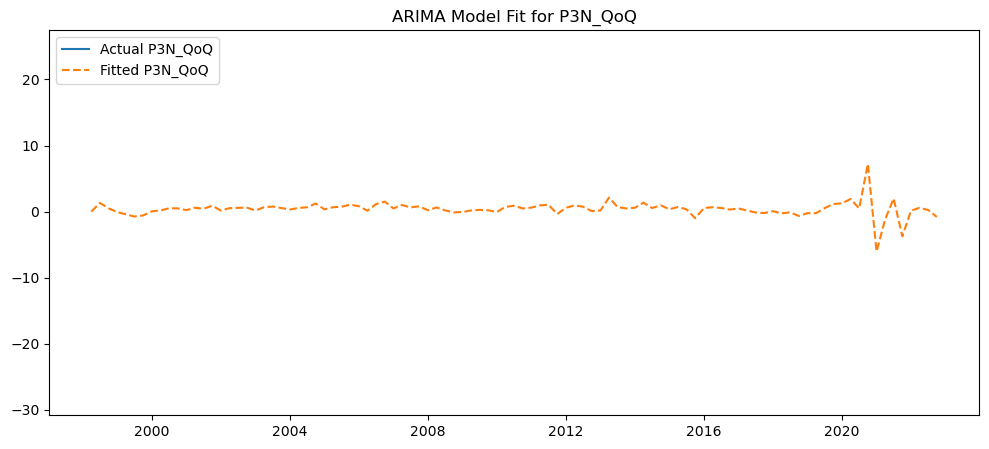

                               SARIMAX Results                                
Dep. Variable:                P3N_QoQ   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -288.954
Date:                Thu, 06 Feb 2025   AIC                            583.908
Time:                        16:43:14   BIC                            591.663
Sample:                    04-01-1998   HQIC                           587.045
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2537      0.043     -5.941      0.000      -0.337      -0.170
ma.L1         -0.9997      1.641     -0.609      0.542      -4.217       2.217
sigma2        20.2333     32.524      0.622      0.5

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


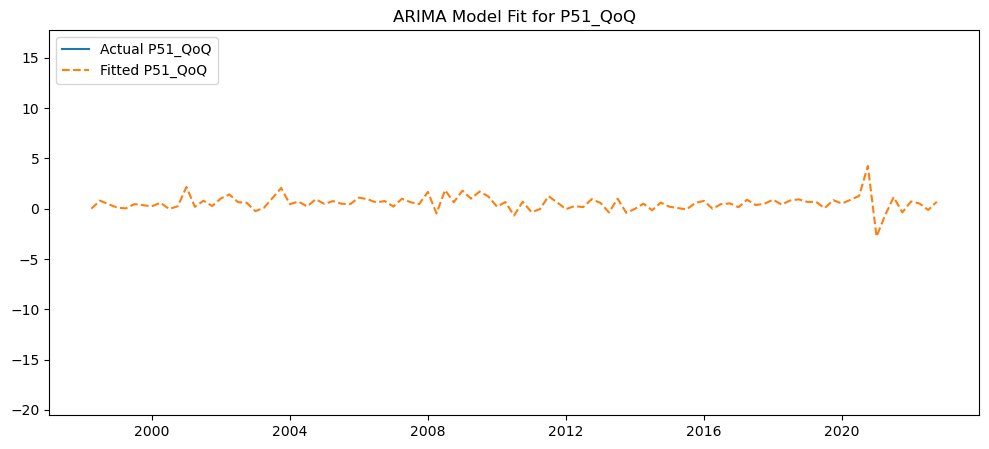

                               SARIMAX Results                                
Dep. Variable:                P51_QoQ   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -267.475
Date:                Thu, 06 Feb 2025   AIC                            540.950
Time:                        16:43:14   BIC                            548.705
Sample:                    04-01-1998   HQIC                           544.087
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2054      0.059     -3.463      0.001      -0.322      -0.089
ma.L1         -0.9997      3.486     -0.287      0.774      -7.832       5.833
sigma2        13.0651     45.068      0.290      0.7

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


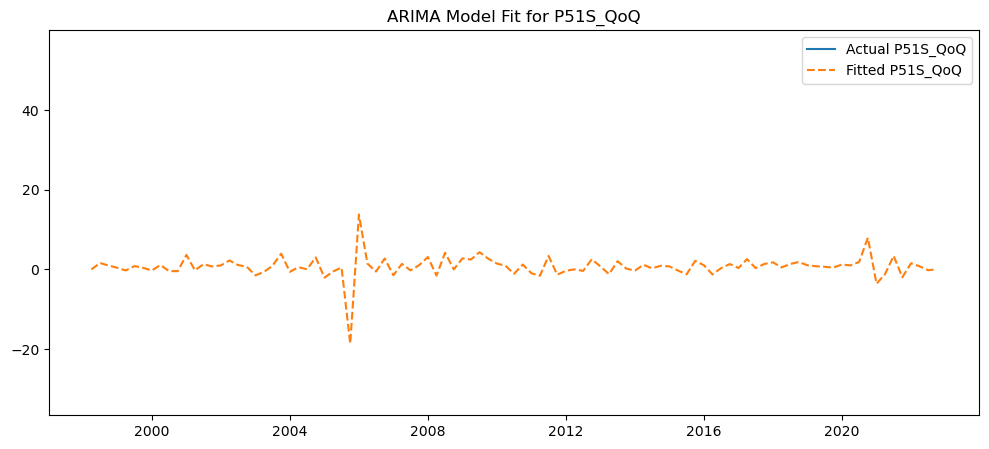

                               SARIMAX Results                                
Dep. Variable:               P51S_QoQ   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -335.562
Date:                Thu, 06 Feb 2025   AIC                            677.123
Time:                        16:43:14   BIC                            684.878
Sample:                    04-01-1998   HQIC                           680.260
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3740      0.060     -6.250      0.000      -0.491      -0.257
ma.L1         -0.9994      3.296     -0.303      0.762      -7.459       5.460
sigma2        52.2465    170.590      0.306      0.7

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


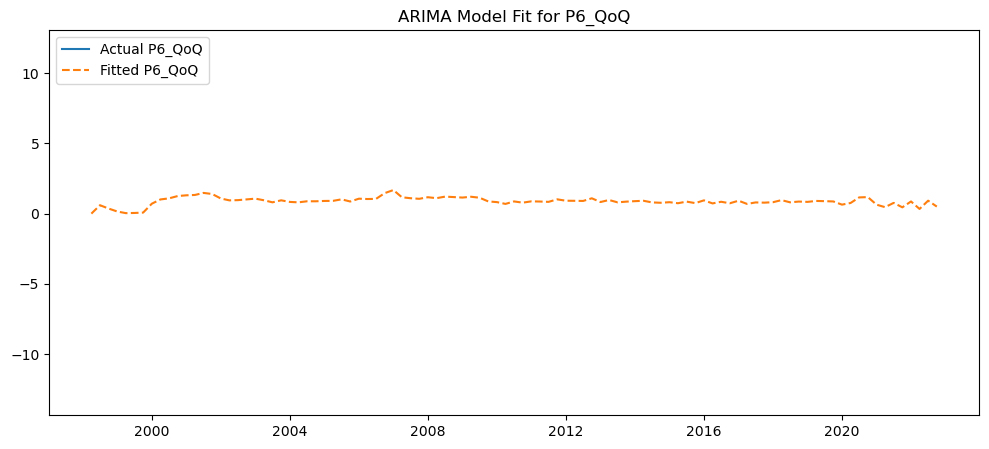

                               SARIMAX Results                                
Dep. Variable:                 P6_QoQ   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -272.843
Date:                Thu, 06 Feb 2025   AIC                            551.687
Time:                        16:43:14   BIC                            559.441
Sample:                    04-01-1998   HQIC                           554.823
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0401      0.092     -0.435      0.664      -0.221       0.141
ma.L1         -0.9996      1.932     -0.517      0.605      -4.785       2.786
sigma2        14.6295     28.265      0.518      0.6

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


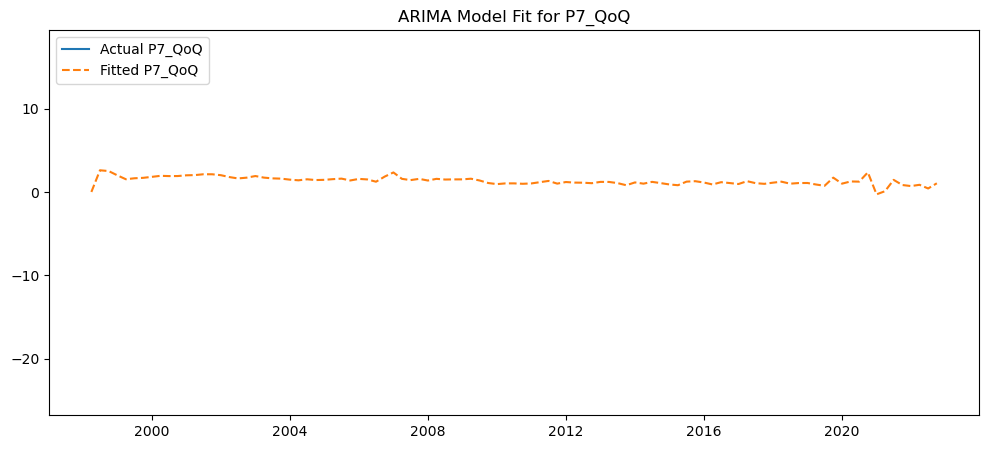

                               SARIMAX Results                                
Dep. Variable:                 P7_QoQ   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -289.736
Date:                Thu, 06 Feb 2025   AIC                            585.473
Time:                        16:43:14   BIC                            593.228
Sample:                    04-01-1998   HQIC                           588.609
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0667      0.048     -1.385      0.166      -0.161       0.028
ma.L1         -0.9997      1.215     -0.823      0.411      -3.381       1.382
sigma2        20.6393     24.503      0.842      0.4

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


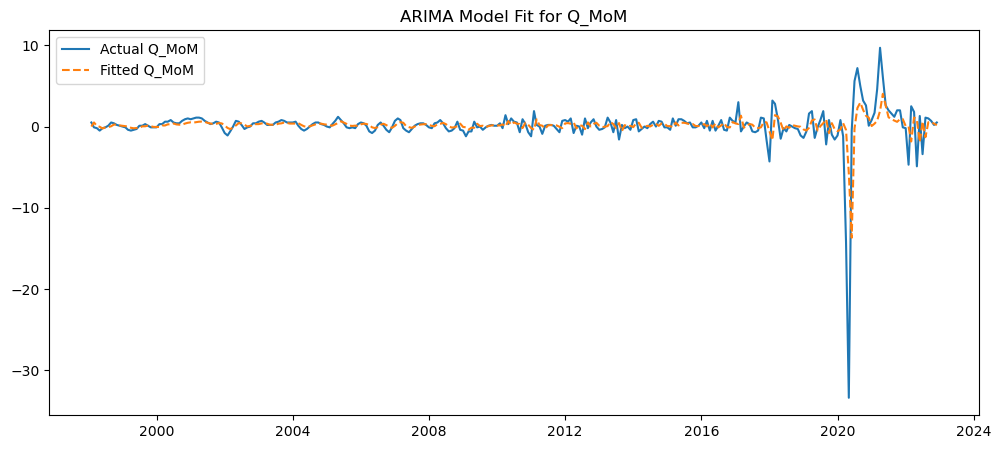

                               SARIMAX Results                                
Dep. Variable:                  Q_MoM   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -670.234
Date:                Thu, 06 Feb 2025   AIC                           1346.467
Time:                        16:43:14   BIC                           1357.558
Sample:                    02-01-1998   HQIC                          1350.907
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4078      0.024     17.114      0.000       0.361       0.454
ma.L1         -0.9999      1.363     -0.734      0.463      -3.671       1.672
sigma2         5.1766      6.977      0.742      0.4

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


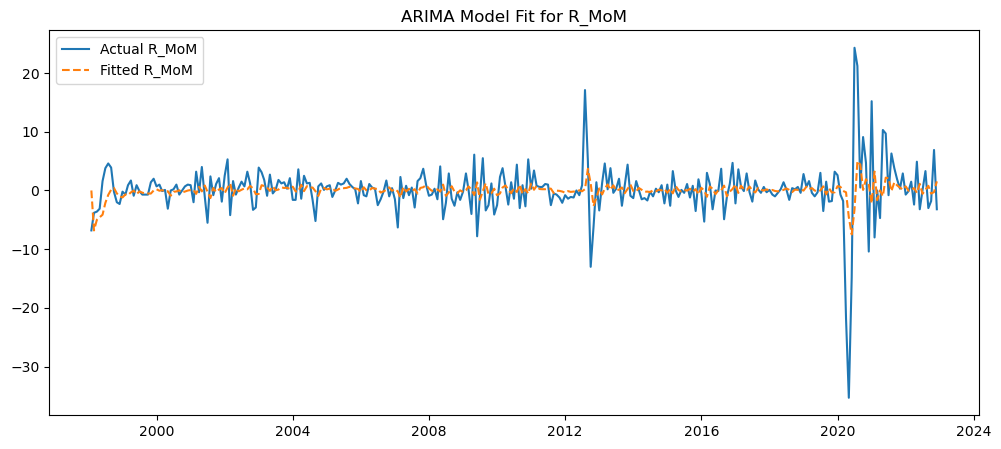

                               SARIMAX Results                                
Dep. Variable:                  R_MoM   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -859.754
Date:                Thu, 06 Feb 2025   AIC                           1725.508
Time:                        16:43:14   BIC                           1736.600
Sample:                    02-01-1998   HQIC                          1729.948
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2081      0.028      7.444      0.000       0.153       0.263
ma.L1         -0.9999      1.304     -0.767      0.443      -3.557       1.557
sigma2        18.4421     24.168      0.763      0.4

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


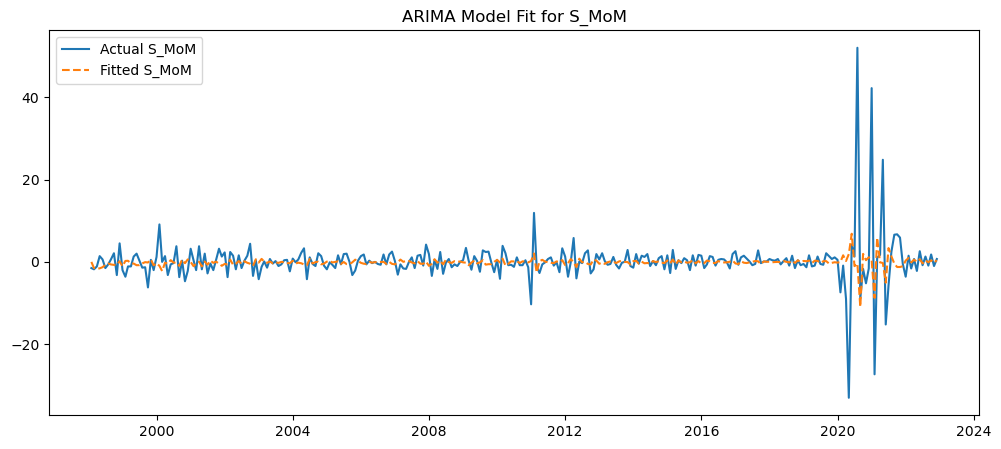

                               SARIMAX Results                                
Dep. Variable:                  S_MoM   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -923.776
Date:                Thu, 06 Feb 2025   AIC                           1853.553
Time:                        16:43:14   BIC                           1864.644
Sample:                    02-01-1998   HQIC                          1857.992
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2111      0.033     -6.317      0.000      -0.277      -0.146
ma.L1         -0.9995      0.174     -5.754      0.000      -1.340      -0.659
sigma2        28.2704      4.791      5.900      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA 

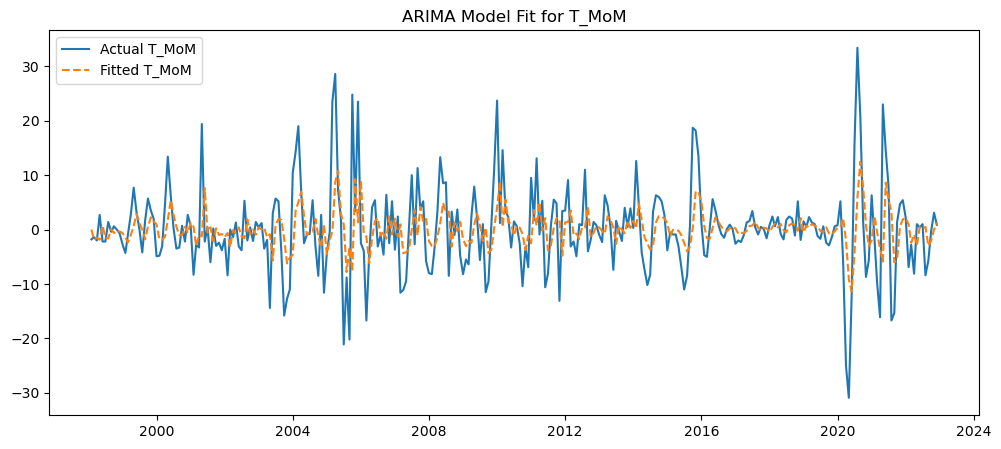

                               SARIMAX Results                                
Dep. Variable:                  T_MoM   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1020.458
Date:                Thu, 06 Feb 2025   AIC                           2046.916
Time:                        16:43:15   BIC                           2058.008
Sample:                    02-01-1998   HQIC                          2051.356
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3684      0.042      8.770      0.000       0.286       0.451
ma.L1         -0.9991      0.334     -2.987      0.003      -1.655      -0.344
sigma2        54.3323     18.029      3.014      0.0

In [12]:
def fit_arima_models(df, target="y", date_column="date", order=(1,1,1)):
    """
    Fits an ARIMA model for each independent variable in a time series dataset.

    Parameters:
    df (pd.DataFrame): Time series data with a datetime column.
    target (str): The target variable (e.g., GDP growth 'y').
    date_column (str): The column containing datetime values.
    order (tuple): ARIMA model order (p, d, q) (default: (1,1,1)).

    Returns:
    models (dict): A dictionary of fitted ARIMA models.
    """


    # Separate target variable and features
    features = [col for col in df.columns if col != target]

    # Dictionary to store ARIMA models
    models = {}

    for feature in features:
        print(f"\nFitting ARIMA{order} model for {feature}...\n")
        
        # drop missing values in the feature column
        df[feature] = df[feature].dropna()

        # Define ARIMA model
        try:
            model = ARIMA(df[feature].dropna(), order=order)
            fitted_model = model.fit()

            # Store the model
            models[feature] = fitted_model

            # Plot actual vs. fitted values
            plt.figure(figsize=(12, 5))
            plt.plot(df[feature], label=f"Actual {feature}")
            plt.plot(fitted_model.fittedvalues, label=f"Fitted {feature}", linestyle='dashed')
            plt.title(f"ARIMA Model Fit for {feature}")
            plt.legend()
            plt.show()

            # Print model summary
            print(fitted_model.summary())

        except Exception as e:
            print(f"Error fitting ARIMA model for {feature}: {e}")

    return models

# Example usage
arima_models = fit_arima_models(df_train, target="y", order=(1,1,1))

In [13]:
def fit_best_arima(df, target="y"):
    """
    Fits the best ARIMA model for each independent variable (excluding target 'y')
    and returns a dataframe with ARIMA predictions.

    Parameters:
    df (pd.DataFrame): Time series dataset with a datetime index.
    target (str): The target variable ('y').

    Returns:
    pd.DataFrame: DataFrame containing ARIMA predictions for each independent variable.
    """

    # Identify independent variables (exclude target variable)
    features = [col for col in df.columns if col != target]

    # Store ARIMA predictions
    arima_predictions = pd.DataFrame(index=df.index)

    for feature in features:
        print(f"Finding best ARIMA model for {feature}...")

        # Drop missing values for the feature
        df_feature = df[feature].dropna()

        try:
            # Use auto_arima to find the best order
            best_model = auto_arima(df_feature, seasonal=False, trace=True, suppress_warnings=True)
            best_order = best_model.order  # Extract (p, d, q)

            # Fit ARIMA with the best order
            model = ARIMA(df_feature, order=best_order)
            fitted_model = model.fit()

            # Predict using ARIMA
            arima_predictions[feature] = fitted_model.predict(start=0, end=len(df)-1)

        except Exception as e:
            print(f"Skipping {feature}: {e}")

    return arima_predictions

# Assuming df_train contains the training data
arima_features = fit_best_arima(df_train, target="y")

# Based on the ARIMA models, we can make predictions for y in the train dataset.
# For each feature, we can use the fitted ARIMA model to predict the value lagged by one time step.
# Prepare dataset for ML (Replace original features with ARIMA-based predictions)
X = arima_features
y = df_train["y"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Print the Mean Squared Error
print(f"Mean Squared Error (MSE): {mse}")

# Extract lags from ARIMA predictions for each feature and put them into dataframe
arima_lags = arima_features.shift(1).add_prefix("lag_")

Finding best ARIMA model for y_lag...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=474.082, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=480.581, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=472.075, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=470.095, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=472.073, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=472.055, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=473.596, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=469.211, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=481.591, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=471.206, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=471.204, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=472.143, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=472.582, Time=0.02 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.135 secon

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=223.186, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=444.014, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=344.164, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=252.155, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=442.014, Time=0.01 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=253.444, Time=0.06 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=217.156, Time=0.16 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=246.653, Time=0.07 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept   : AIC=220.196, Time=0.19 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=212.090, Time=0.18 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=217.225, Time=0.15 sec
 ARIMA(4,2,3)(0,0,0)[0] intercept   : AIC=213.233, Time=0.19 sec
 ARIMA(3,2,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,2,4)(0,0,0)[0] intercept   : AIC=212.808, Time=0.21 sec
 ARIMA(4,2,4)(0,0,0)[0] intercept

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Finding best ARIMA model for m4...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=791.224, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=804.462, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=803.489, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=804.035, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=802.731, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=799.576, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=799.665, Time=0.05 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=803.321, Time=0.05 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=798.592, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=801.348, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=801.411, Time=0.04 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=788.188, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=753.901, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=750.112, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=744.669, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=751.437, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=749.394, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=746.262, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=746.507, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=745.684, Time=0.04 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=735.794, Time=0.10 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=737.559, Time=0.16 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=737.637, Time=0.22 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=748.021, Time=0.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=748.013, Time=0.07 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=739.751, Time=0.26 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=733.882, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0]  

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Finding best ARIMA model for loans...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5474.484, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5649.471, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5537.993, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5479.666, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5647.473, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5473.928, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5472.014, Time=0.03 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=5473.880, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5472.393, Time=0.02 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5475.855, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=5470.034, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5477.689, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=5471.947, Time=0.02 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=5471.690, Time=0.02

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3571.927, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3504.114, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3606.072, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3514.194, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3507.991, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3508.904, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3505.940, Time=0.01 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.210 seconds
Finding best ARIMA model for br...
Performing stepwise search to minimize aic


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-436.720, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-238.098, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-439.999, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-376.401, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-237.700, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-438.069, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-438.092, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-436.478, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-441.880, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-439.960, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-439.987, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-377.093, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-438.344, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.436 seconds
Finding best ARIMA model for gscpi...
Performing stepwise search 

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=250.762, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=261.387, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=262.480, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=262.215, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=259.519, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=248.911, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=259.673, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=262.132, Time=0.04 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=259.956, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=249.145, Time=0.06 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=248.548, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=257.821, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=260.253, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[0]          

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1192.745, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1208.212, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1208.260, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1206.183, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1211.815, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-1209.856, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1209.916, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1210.940, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1207.816, Time=0.03 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.390 seconds
Finding best ARIMA model for GBP/EU...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1404.762, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1404.115, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1409.406, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   :

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1408.234, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1406.480, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1411.292, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1409.592, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1409.530, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1410.769, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1408.020, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.411 seconds


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Finding best ARIMA model for unemply...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-569.900, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-510.022, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-548.440, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-533.053, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-510.019, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-570.393, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-559.719, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-571.652, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-570.791, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-571.037, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-573.364, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-533.621, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-549.495, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-572.445, Time=0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1571.668, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1591.293, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1576.477, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1569.636, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1608.780, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1569.438, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1570.278, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1569.739, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1568.713, Time=0.02 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1570.067, Time=0.03 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1570.514, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1605.342, Time=0.01 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 0.330 seconds
Finding best ARIMA model for oil_pl...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1166.94

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1165.686, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1162.403, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1163.068, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1163.434, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1163.367, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1164.362, Time=0.03 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.270 seconds
Finding best ARIMA model for us_gdp...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2454.402, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2446.461, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2448.897, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2448.770, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2457.834, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2450.369, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
To

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT wil

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2426.972, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2427.040, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2427.631, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2428.872, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.073 seconds
Finding best ARIMA model for sr...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=68.932, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=104.884, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=66.440, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=69.552, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=104.655, Time=0.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=65.431, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=67.223, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=67.234, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=65.271, Time=0.01 sec
 AR

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequenc

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=831.871, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=833.871, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=833.871, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=835.632, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=826.440, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=827.909, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=827.894, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=829.711, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.120 seconds
Finding best ARIMA model for expp...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=813.705, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=831.491, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=815.536, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=808.295, Time=0.01 sec
 A

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequenc

 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=802.282, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=794.494, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=796.469, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=796.468, Time=0.01 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=793.572, Time=0.00 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=798.467, Time=0.03 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.117 seconds
Finding best ARIMA model for visa...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1938.712, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2114.018, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1961.143, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2065.085, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1936.959, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2058.743, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1957.346, Time=

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1937.968, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1925.205, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1921.007, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1921.015, Time=0.01 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1920.129, Time=0.01 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1920.586, Time=0.01 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=1916.006, Time=0.10 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=1914.586, Time=0.03 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=1904.800, Time=0.04 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1922.790, Time=0.04 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=1894.681, Time=0.04 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=1893.399, Time=0.04 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1890.996, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1920.282, Time=0.01 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1902.854, Time=0.01 sec
 ARIMA(4,0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


Finding best ARIMA model for A_MoM...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1030.266, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1307.569, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1040.657, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1114.393, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1029.404, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1059.943, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1028.124, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1028.346, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1026.519, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1028.334, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1030.332, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1027.959, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 0.276 seconds
Finding best ARIMA model for A_QoQ...
Performing s

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


 ARIMA(3,0,3)(0,0,0)[0]             : AIC=591.398, Time=0.06 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=589.791, Time=0.03 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=595.176, Time=0.03 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=590.154, Time=0.07 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=589.333, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=589.608, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=592.112, Time=0.03 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=595.163, Time=0.04 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=591.343, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=607.561, Time=0.02 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=589.531, Time=0.05 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=593.726, Time=0.04 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=588.750, Time=0.08 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization faile

 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1730.148, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1730.834, Time=0.03 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1731.136, Time=0.06 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1721.704, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1730.614, Time=0.02 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1720.807, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1731.969, Time=0.04 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=1722.107, Time=0.07 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1717.269, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1725.996, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1725.227, Time=0.04 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1719.250, Time=0.11 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1723.057, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1725.172, Time=0.02 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1720.037, Time=0.07 sec
 ARIMA(3,0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1170.571, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1178.729, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1176.622, Time=0.01 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1171.970, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1171.764, Time=0.01 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1173.850, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1171.999, Time=0.10 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 0.339 seconds
Finding best ARIMA model for BE_QoQ...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=471.526, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=471.021, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=468.188, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=467.617, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=469.616, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=469.616, Tim

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT wil

 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1333.461, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1323.626, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1321.758, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1330.663, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1328.577, Time=0.01 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1322.920, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1322.916, Time=0.01 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1324.569, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1320.451, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1328.863, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1329.031, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1321.863, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1322.032, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1334.635, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1322.071, Time=0.04 sec
 ARIMA(3,0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so infer

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1611.634, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1610.140, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1612.106, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1612.107, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1614.107, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1612.116, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.123 seconds
Finding best ARIMA model for E_MoM...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1327.043, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1334.265, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1330.642, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1329.318, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1325.384, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1327.414, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1323.404

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be use

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1325.379, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1330.444, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1325.375, Time=0.03 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.181 seconds
Finding best ARIMA model for F_MoM...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1527.338, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1553.037, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1549.260, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1545.234, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1527.296, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1535.878, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1544.009, Time=0.01 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1527.560, Time=0.02 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=1526.220, Time=0.02 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=1527.678

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT wil

 ARIMA(1,0,1)(0,0,0)[0]             : AIC=617.575, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=617.576, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=619.573, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=617.029, Time=0.01 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.121 seconds
Finding best ARIMA model for G_MoM...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1516.346, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1542.705, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1540.615, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1537.109, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1514.729, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1522.287, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1533.861, Time=0.02 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1516.298, Time=0.04 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=1514.903, Ti

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Finding best ARIMA model for GT_MoM...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1041.808, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1090.906, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1058.428, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1049.961, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1048.880, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1040.036, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1051.860, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1045.076, Time=0.01 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1041.872, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1042.141, Time=0.01 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1040.357, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1035.324, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1051.251, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1043.466, Time=0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT wil

 ARIMA(1,0,2)(0,0,0)[0]             : AIC=492.905, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=485.493, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=490.382, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=487.400, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=486.433, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=487.579, Time=0.02 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.156 seconds
Finding best ARIMA model for GVA_MoM...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1057.347, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1106.967, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1082.440, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1070.922, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1062.694, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1055.386, Time=0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1542.346, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1549.841, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1550.128, Time=0.01 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1546.023, Time=0.02 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=1545.968, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1543.262, Time=0.02 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1544.933, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 0.342 seconds
Finding best ARIMA model for I_MoM...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2235.790, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2401.927, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2312.637, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2294.914, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2250.726, Tim

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2232.541, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2237.012, Time=0.03 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=2225.780, Time=0.07 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=2237.519, Time=0.03 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=2227.001, Time=0.12 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=2226.444, Time=0.07 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=2228.309, Time=0.05 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=2234.267, Time=0.06 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=2229.531, Time=0.21 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=2226.269, Time=0.15 sec

Best model:  ARIMA(4,0,2)(0,0,0)[0]          
Total fit time: 0.919 seconds


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA 

Finding best ARIMA model for IOS_MoM...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1041.808, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1090.906, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1058.428, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1049.961, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1048.880, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1040.036, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1051.860, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1045.076, Time=0.01 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1041.872, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1042.141, Time=0.01 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1040.357, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1035.324, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1051.251, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1043.466, Time=0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1573.382, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1571.908, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-1572.125, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1581.779, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1583.380, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1575.218, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-1577.315, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-1580.155, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-1582.176, Time=0.03 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-1580.085, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1553.404, Time=0.10 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 0.435 seconds


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Finding best ARIMA model for J_MoM...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1220.387, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1491.610, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1391.518, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1489.612, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1226.158, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1220.766, Time=0.06 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1225.031, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1217.799, Time=0.09 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=1217.847, Time=0.17 sec
 ARIMA(3,1,4)(0,0,0)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Finding best ARIMA model for K_MoM...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1270.600, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1270.060, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1270.653, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1270.845, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1271.909, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1270.606, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.230 seconds
Finding best ARIMA model for L_MoM...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=368.828, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=398.663, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=386.169, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=388.993, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=367.558, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AI

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=368.211, Time=0.04 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=369.199, Time=0.06 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=380.984, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=367.340, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=382.909, Time=0.01 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=368.747, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=376.829, Time=0.02 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=362.979, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=360.999, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=361.572, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=361.252, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=362.974, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=363.028, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=363.044, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] inter

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1246.239, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1250.991, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1248.158, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1248.171, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1248.041, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1250.449, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1250.090, Time=0.07 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.404 seconds
Finding best ARIMA model for O_MoM...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=560.980, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=574.548, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=575.790, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=575.965, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=564.191, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=565.981, Time

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


 ARIMA(2,0,3)(0,0,0)[0]             : AIC=567.639, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=574.562, Time=0.02 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=565.514, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=567.021, Time=0.03 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=562.451, Time=0.10 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=561.294, Time=0.11 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 0.512 seconds
Finding best ARIMA model for N_MoM...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1434.511, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1447.677, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1449.139, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1448.689, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1432.636, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1432.721, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1445.906, Time

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1433.100, Time=0.03 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=1432.515, Time=0.02 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=1434.511, Time=0.02 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=1435.078, Time=0.04 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1427.004, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1428.562, Time=0.02 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1428.075, Time=0.07 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=1428.928, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1426.856, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1445.293, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1428.818, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1448.061, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1428.002, Time=0.03 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1429.604, Time=0.09 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 0.650 seconds

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1249.168, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1248.898, Time=0.04 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 0.238 seconds
Finding best ARIMA model for P3G_QoQ...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=498.172, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=500.186, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=497.907, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=497.193, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=499.165, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=499.121, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=498.388, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=491.266, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=498.379, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=490.971, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=493.925, Time=0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT wil

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=492.797, Time=0.03 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.166 seconds
Finding best ARIMA model for P3H_QoQ...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=511.931, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=526.881, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=518.137, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=517.483, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=517.605, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=515.780, Time=0.01 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=513.363, Time=0.02 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=512.684, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=518.984, Time=0.01 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=512.964, Time=0.01 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=514.312, Time=0.01 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=514.124, Time=0.02

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=578.242, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=587.904, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=583.587, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=583.627, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=583.594, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=581.596, Time=0.01 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=579.756, Time=0.03 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=578.265, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=585.322, Time=0.01 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=576.604, Time=0.01 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=578.074, Time=0.01 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=576.253, Time=0.03 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=574.992, Time=0.01 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=576.636, Time=0.02 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=577.816, Time=0.06 sec
 ARIMA(0,0,4)(0,0,0)[0] i

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=540.886, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=540.880, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=540.381, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.248 seconds
Finding best ARIMA model for P51S_QoQ...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=677.111, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=690.118, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=677.406, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=675.658, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=677.378, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=677.269, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=678.374, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=674.952, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=691.326, Time=0.00 se

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequenc

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=677.541, Time=0.02 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.115 seconds
Finding best ARIMA model for P6_QoQ...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=552.508, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=554.506, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=554.506, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=556.506, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=549.758, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=551.519, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=551.494, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.131 seconds
Finding best ARIMA model for P7_QoQ...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AI

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=585.810, Time=0.01 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=586.679, Time=0.04 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=587.121, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=589.737, Time=0.01 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=587.764, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=588.506, Time=0.07 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=581.473, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=580.667, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=578.669, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=584.773, Time=0.02 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=580.665, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=582.067, Time=0.03 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=580.149, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=585.696, Time=0.01 sec

Best model:  ARIMA(0,0,2)(0,

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1336.855, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1336.078, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1337.651, Time=0.02 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=1336.829, Time=0.02 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1333.401, Time=0.04 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1338.659, Time=0.03 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=1338.194, Time=0.04 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=1336.222, Time=0.02 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=1340.089, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec

Best model:  ARIMA(1,0,3)(0,0,0)[0]          
Total fit time: 0.515 seconds


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Finding best ARIMA model for R_MoM...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1708.189, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1733.918, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1723.184, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1718.306, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1706.263, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1718.464, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1714.722, Time=0.01 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1708.243, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1714.785, Time=0.02 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1709.581, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1707.354, Time=0.03 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 0.287 seconds
Finding best ARIMA model for S_MoM...
Performing stepwi

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1851.207, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1836.036, Time=0.03 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.177 seconds
Finding best ARIMA model for T_MoM...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1961.663, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2086.651, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2045.989, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2052.297, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1961.953, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1999.089, Time=0.02 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1943.373, Time=0.03 sec


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1943.022, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1943.031, Time=0.02 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=1944.922, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2042.025, Time=0.02 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1942.975, Time=0.02 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1944.621, Time=0.03 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=1944.321, Time=0.08 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1944.793, Time=0.05 sec

Best model:  ARIMA(4,0,0)(0,0,0)[0]          
Total fit time: 0.446 seconds


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ValueError: Input y contains NaN.

In [18]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

def extract_best_arima_lags(df, target="y"):
    """
    Extracts the best ARIMA model lags (p, d, q) for each independent variable (excluding target 'y')
    and prints them.

    Parameters:
    df (pd.DataFrame): Time series dataset with a datetime index.
    target (str): The target variable ('y').

    Returns:
    dict: Dictionary of features with their best (p, d, q) lags.
    """

    # Identify independent variables (exclude target variable)
    features = [col for col in df.columns if col != target]

    # Store best ARIMA lags
    arima_lags = {}

    for feature in features:
        print(f"Finding best ARIMA lags for {feature}...")

        # Drop missing values for the feature
        df_feature = df[feature].dropna()

        try:
            # Use auto_arima to find the best order
            best_model = auto_arima(df_feature, seasonal=False, trace=False, suppress_warnings=True)
            best_order = best_model.order  # Extract (p, d, q)

            # Store in dictionary
            arima_lags[feature] = best_order

        except Exception as e:
            print(f"Skipping {feature}: {e}")

    return arima_lags

# Assuming df_train contains the training data
best_arima_lags = extract_best_arima_lags(df_train, target="y")

# Print the best ARIMA lags for each feature
for feature, (p, d, q) in best_arima_lags.items():
    print(f"{feature}: (p={p}, d={d}, q={q})")

Finding best ARIMA lags for y_lag...
Finding best ARIMA lags for cpi...
Finding best ARIMA lags for m4...
Finding best ARIMA lags for m4_lend...
Finding best ARIMA lags for loans...
Finding best ARIMA lags for net_lend...
Finding best ARIMA lags for br...
Finding best ARIMA lags for gscpi...
Finding best ARIMA lags for GBP/US...
Finding best ARIMA lags for GBP/EU...
Finding best ARIMA lags for unemply...
Finding best ARIMA lags for awe...
Finding best ARIMA lags for oil_pl...
Finding best ARIMA lags for us_gdp...
Finding best ARIMA lags for eu_gdp...
Finding best ARIMA lags for sr...
Finding best ARIMA lags for imp...
Finding best ARIMA lags for exp...
Finding best ARIMA lags for expp...
Finding best ARIMA lags for pop...
Finding best ARIMA lags for visa...
Finding best ARIMA lags for A_MoM...
Finding best ARIMA lags for A_QoQ...
Finding best ARIMA lags for B_MoM...
Finding best ARIMA lags for BE_MoM...
Finding best ARIMA lags for BE_QoQ...
Finding best ARIMA lags for C_MoM...
Finding 

In [19]:
from pmdarima import auto_arima
import pandas as pd

def extract_best_arima_p(df, target="y"):
    """
    Extracts the best ARIMA p-values for each independent variable (excluding target 'y')
    and prints them in a table format.

    Parameters:
    df (pd.DataFrame): Time series dataset with a datetime index.
    target (str): The target variable ('y').

    Returns:
    pd.DataFrame: DataFrame with features and their best p-values.
    """
    
    # Identify independent variables (exclude target variable)
    features = [col for col in df.columns if col != target]
    
    # Store best ARIMA p-values
    arima_p_values = {}

    for feature in features:
        print(f"Finding best ARIMA p-value for {feature}...")
        
        # Drop missing values for the feature
        df_feature = df[feature].dropna()
        
        try:
            # Use auto_arima to find the best order
            best_model = auto_arima(df_feature, seasonal=False, trace=False, suppress_warnings=True)
            best_p = best_model.order[0]  # Extract p value
            
            # Store in dictionary
            arima_p_values[feature] = best_p
        
        except Exception as e:
            print(f"Skipping {feature}: {e}")
    
    # Convert to DataFrame for better visualization
    p_values_df = pd.DataFrame(list(arima_p_values.items()), columns=["Feature", "Best p"])
    
    return p_values_df

# Assuming df_train contains the training data
best_arima_p_values = extract_best_arima_p(df_train, target="y")

# Display the table
import ace_tools as tools  # Required for displaying DataFrame
tools.display_dataframe_to_user(name="Best ARIMA p-values", dataframe=best_arima_p_values)


Finding best ARIMA p-value for y_lag...
Finding best ARIMA p-value for cpi...
Finding best ARIMA p-value for m4...
Finding best ARIMA p-value for m4_lend...
Finding best ARIMA p-value for loans...
Finding best ARIMA p-value for net_lend...
Finding best ARIMA p-value for br...
Finding best ARIMA p-value for gscpi...
Finding best ARIMA p-value for GBP/US...
Finding best ARIMA p-value for GBP/EU...
Finding best ARIMA p-value for unemply...
Finding best ARIMA p-value for awe...
Finding best ARIMA p-value for oil_pl...
Finding best ARIMA p-value for us_gdp...
Finding best ARIMA p-value for eu_gdp...
Finding best ARIMA p-value for sr...
Finding best ARIMA p-value for imp...
Finding best ARIMA p-value for exp...
Finding best ARIMA p-value for expp...
Finding best ARIMA p-value for pop...
Finding best ARIMA p-value for visa...
Finding best ARIMA p-value for A_MoM...
Finding best ARIMA p-value for A_QoQ...
Finding best ARIMA p-value for B_MoM...
Finding best ARIMA p-value for BE_MoM...
Finding 

ModuleNotFoundError: No module named 'ace_tools'

In [21]:
print(best_arima_p_values)

# store this into a new csv file
best_arima_p_values.to_csv('best_arima_p_values.csv', index=False)


     Feature  Best p
0      y_lag       0
1        cpi       5
2         m4       2
3    m4_lend       2
4      loans       0
5   net_lend       0
6         br       1
7      gscpi       1
8     GBP/US       1
9     GBP/EU       0
10   unemply       1
11       awe       0
12    oil_pl       1
13    us_gdp       0
14    eu_gdp       0
15        sr       1
16       imp       1
17       exp       0
18      expp       0
19       pop       0
20      visa       5
21     A_MoM       2
22     A_QoQ       4
23     B_MoM       2
24    BE_MoM       2
25    BE_QoQ       0
26     C_MoM       2
27     C_QoQ       0
28     D_MoM       0
29     E_MoM       1
30     F_MoM       0
31     F_QoQ       0
32     G_MoM       1
33    GT_MoM       2
34    GT_QoQ       0
35   GVA_MoM       2
36     H_MoM       1
37     I_MoM       4
38   IOS_MoM       2
39   IOP_MoM       2
40     J_MoM       2
41     K_MoM       0
42     L_MoM       1
43     M_MoM       1
44     O_MoM       2
45     N_MoM       1
46     P_MoM 

In [22]:
# print the best arima model functions


{'y_lag': (0, 0, 1), 'cpi': (5, 2, 5), 'm4': (2, 1, 2), 'm4_lend': (2, 1, 3), 'loans': (0, 1, 2), 'net_lend': (0, 1, 1), 'br': (1, 1, 0), 'gscpi': (1, 1, 2), 'GBP/US': (1, 1, 0), 'GBP/EU': (0, 1, 1), 'unemply': (1, 1, 1), 'awe': (0, 1, 2), 'oil_pl': (1, 1, 0), 'us_gdp': (0, 1, 0), 'eu_gdp': (0, 1, 0), 'sr': (1, 1, 1), 'imp': (1, 1, 0), 'exp': (0, 0, 0), 'expp': (0, 0, 1), 'pop': (0, 2, 0), 'visa': (5, 0, 0), 'A_MoM': (2, 0, 0), 'A_QoQ': (4, 0, 3), 'B_MoM': (2, 0, 2), 'BE_MoM': (2, 0, 1), 'BE_QoQ': (0, 0, 1), 'C_MoM': (2, 0, 1), 'C_QoQ': (0, 0, 1), 'D_MoM': (0, 0, 0), 'E_MoM': (1, 0, 1), 'F_MoM': (0, 0, 3), 'F_QoQ': (0, 0, 1), 'G_MoM': (1, 0, 2), 'GT_MoM': (2, 0, 1), 'GT_QoQ': (0, 0, 1), 'GVA_MoM': (2, 0, 1), 'H_MoM': (1, 0, 2), 'I_MoM': (4, 0, 2), 'IOS_MoM': (2, 0, 1), 'IOP_MoM': (2, 0, 1), 'J_MoM': (2, 1, 4), 'K_MoM': (0, 0, 0), 'L_MoM': (1, 0, 1), 'M_MoM': (1, 0, 1), 'O_MoM': (2, 0, 2), 'N_MoM': (1, 0, 2), 'P_MoM': (2, 0, 1), 'P3G_QoQ': (1, 0, 1), 'P3H_QoQ': (2, 0, 2), 'P3N_QoQ': (0,